In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import savemat, loadmat
import scipy.sparse as sp

# Model under Noisy Condition

The anchors choosen in this dataset is **uniformly ditributed** in the plane. The number of anchors is **25**, and the number of agents is **475**.

In [2]:
N = 500
N_anchors = 25
N_agents = 475
num_sample = 100

### Labels Generation

#### Initialization

In [3]:
Uniform_100samples_25anchors_475agents_0Variance_labels = np.zeros((num_sample, N, 2))

In [4]:
Uniform_100samples_25anchors_475agents_00025Variance_labels = np.zeros((num_sample, N, 2)) # 0.0025 Variance
Uniform_100samples_25anchors_475agents_001Variance_labels = np.zeros((num_sample, N, 2)) # 0.01 Variance
Uniform_100samples_25anchors_475agents_004Variance_labels = np.zeros((num_sample, N, 2)) # 0.04 Variance
Uniform_100samples_25anchors_475agents_009Variance_labels = np.zeros((num_sample, N, 2)) # 0.09 Variance
Uniform_100samples_25anchors_475agents_016Variance_labels = np.zeros((num_sample, N, 2)) # 0.16 Variance
Uniform_100samples_25anchors_475agents_025Variance_labels = np.zeros((num_sample, N, 2)) # 0.25 Variance

#### Fix the anchors

In [4]:
idx_anchors = range(25)

In [5]:
cnt = 0
for i in range(5):
    for j in range(5):
        for k in range(num_sample):
            Uniform_100samples_25anchors_475agents_0Variance_labels[k][cnt][0] = 1.0 / 4.0 * i
            Uniform_100samples_25anchors_475agents_0Variance_labels[k][cnt][1] = 1.0 / 4.0 * j
        cnt = cnt + 1

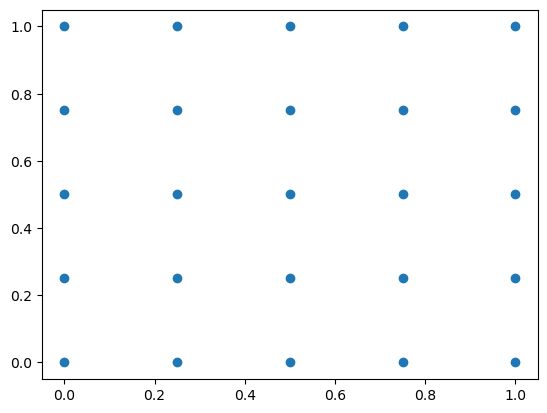

In [6]:
plt.scatter(Uniform_100samples_25anchors_475agents_0Variance_labels[0].T[0][:25], Uniform_100samples_25anchors_475agents_0Variance_labels[0].T[1][:25])

#### Generate the Agents

In [7]:
np.random.seed(42)

In [8]:
print(np.random.rand())

0.3745401188473625


In [9]:
for k in range(num_sample):
    #
    Uniform_100samples_25anchors_475agents_0Variance_labels[k].T[0][N_anchors:] = np.random.rand(N_agents)
    Uniform_100samples_25anchors_475agents_0Variance_labels[k].T[1][N_anchors:] = np.random.rand(N_agents)

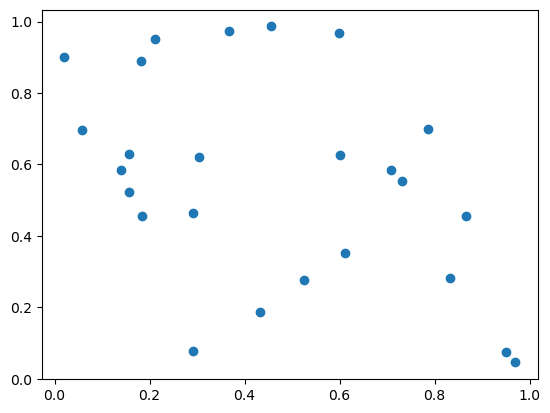

In [10]:
plt.scatter(Uniform_100samples_25anchors_475agents_0Variance_labels[0].T[0][25:50], Uniform_100samples_25anchors_475agents_0Variance_labels[0].T[1][25:50])

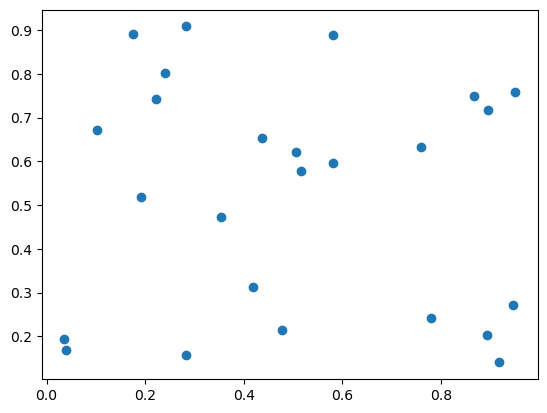

In [11]:
plt.scatter(Uniform_100samples_25anchors_475agents_0Variance_labels[3].T[0][25:50], Uniform_100samples_25anchors_475agents_0Variance_labels[3].T[1][25:50])

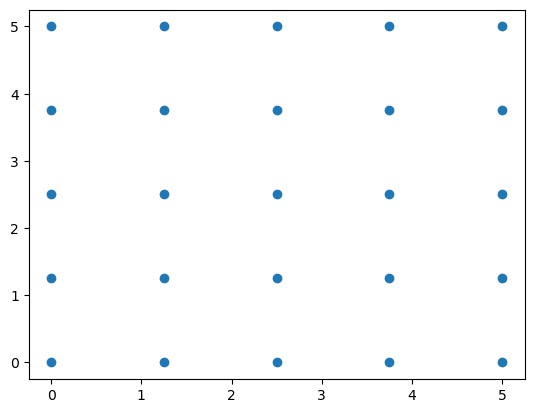

In [13]:
plt.scatter(Uniform_100samples_25anchors_475agents_0Variance_labels[0].T[0][:25], Uniform_100samples_25anchors_475agents_0Variance_labels[0].T[1][:25])

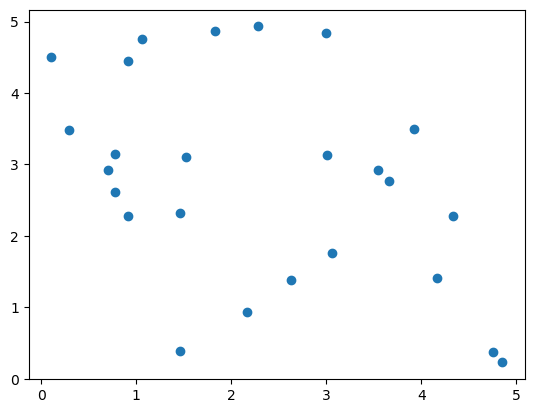

In [14]:
plt.scatter(Uniform_100samples_25anchors_475agents_0Variance_labels[0].T[0][25:50], Uniform_100samples_25anchors_475agents_0Variance_labels[0].T[1][25:50])

### Distance Generation

In [15]:
def compute_distance_matrix(points):
    diff = points[:, np.newaxis, :] - points[np.newaxis, :, :]
    dist_matrix = np.sqrt(np.sum(diff**2, axis=-1)) 
    return dist_matrix

In [16]:
def compute_distance_matrix_noise(points, mean, var):
    diff = points[:, np.newaxis, :] - points[np.newaxis, :, :]
    dist_matrix = np.sqrt(np.sum(diff**2, axis=-1)) 
    dist_matrix_noise = dist_matrix + np.random.normal(loc=mean, scale=np.sqrt(var), size=dist_matrix.shape) * dist_matrix
    return dist_matrix_noise

#### Initialization

In [17]:
Uniform_100samples_25anchors_475agents_0Variance_dist = np.zeros((100, N, N))

In [18]:
Uniform_100samples_25anchors_475agents_00025Variance_dist = np.zeros((100, N, N)) # 5%
Uniform_100samples_25anchors_475agents_001Variance_dist = np.zeros((100, N, N)) # 10%
Uniform_100samples_25anchors_475agents_00225Variance_dist = np.zeros((100, N, N)) # 15%
Uniform_100samples_25anchors_475agents_004Variance_dist = np.zeros((100, N, N)) # 20%
Uniform_100samples_25anchors_475agents_00625Variance_dist = np.zeros((100, N, N)) # 25%

In [16]:
Uniform_100samples_25anchors_475agents_009Variance_dist = np.zeros((100, N, N)) # 25%
Uniform_100samples_25anchors_475agents_016Variance_dist = np.zeros((100, N, N)) # 25%

In [18]:
Uniform_100samples_25anchors_475agents_00025Variance_dist = np.zeros((100, N, N)) # 0.0025 Variance
Uniform_100samples_25anchors_475agents_001Variance_dist = np.zeros((100, N, N)) # 0.01 Variance
Uniform_100samples_25anchors_475agents_004Variance_dist = np.zeros((100, N, N)) # 0.04 Variance
Uniform_100samples_25anchors_475agents_009Variance_dist = np.zeros((100, N, N)) # 0.09 Variance
Uniform_100samples_25anchors_475agents_016Variance_dist = np.zeros((100, N, N)) # 0.16 Variance
Uniform_100samples_25anchors_475agents_025Variance_dist = np.zeros((100, N, N)) # 0.25 Variance

#### Compute the diatance matrices

In [24]:
for k in range(num_sample):
    # Uniform_100samples_25anchors_475agents_0Variance_dist[k] = compute_distance_matrix(Uniform_100samples_25anchors_475agents_0Variance_labels[k])
    # Uniform_100samples_25anchors_475agents_00025Variance_dist[k] = compute_distance_matrix_noise(Uniform_100samples_25anchors_475agents_0Variance_labels[k], 0.0, 0.0025) # 0.0025 Variance
    # Uniform_100samples_25anchors_475agents_001Variance_dist[k] = compute_distance_matrix_noise(Uniform_100samples_25anchors_475agents_0Variance_labels[k], 0.0, 0.01) # 0.01 Variance
    # Uniform_100samples_25anchors_475agents_004Variance_dist[k] = compute_distance_matrix_noise(Uniform_100samples_25anchors_475agents_0Variance_labels[k], 0.0, 0.04) # 0.04 Variance
    # Uniform_100samples_25anchors_475agents_009Variance_dist[k] = compute_distance_matrix_noise(Uniform_100samples_25anchors_475agents_0Variance_labels[k], 0.0, 0.09) # 0.09 Variance
    # Uniform_100samples_25anchors_475agents_016Variance_dist[k] = compute_distance_matrix_noise(Uniform_100samples_25anchors_475agents_0Variance_labels[k], 0.0, 0.16) # 0.16 Variance
    # Uniform_100samples_25anchors_475agents_025Variance_dist[k] = compute_distance_matrix_noise(Uniform_100samples_25anchors_475agents_0Variance_labels[k], 0.0, 0.25) # 0.25 Variance
    # Uniform_100samples_25anchors_475agents_00025Variance_dist[k] = compute_distance_matrix_noise(Uniform_100samples_25anchors_475agents_0Variance_labels[k], 0.0, 0.0025) # 5%
    # Uniform_100samples_25anchors_475agents_001Variance_dist[k] = compute_distance_matrix_noise(Uniform_100samples_25anchors_475agents_0Variance_labels[k], 0.0, 0.01) # 10%
    # Uniform_100samples_25anchors_475agents_00225Variance_dist[k] = compute_distance_matrix_noise(Uniform_100samples_25anchors_475agents_0Variance_labels[k], 0.0, 0.0225) # 15%
    Uniform_100samples_25anchors_475agents_004Variance_dist[k] = compute_distance_matrix_noise(Uniform_100samples_25anchors_475agents_0Variance_labels[k], 0.0, 0.04) # 20%
    Uniform_100samples_25anchors_475agents_00625Variance_dist[k] = compute_distance_matrix_noise(Uniform_100samples_25anchors_475agents_0Variance_labels[k], 0.0, 0.0625) # 25%

### Save the matrices

In [25]:
# savemat('Uniform_100samples_25anchors_475agents_0Variance.mat', {'labels': Uniform_100samples_25anchors_475agents_0Variance_labels, 'dist': Uniform_100samples_25anchors_475agents_0Variance_dist, 'range': Uniform_100samples_25anchors_475agents_0Variance_dist, 'N_anchors': N_anchors, 'N_agents': N_agents})
# savemat('Uniform_100samples_25anchors_475agents_00025Variance.mat', {'labels': Uniform_100samples_25anchors_475agents_0Variance_labels, 'dist': Uniform_100samples_25anchors_475agents_0Variance_dist, 'range': Uniform_100samples_25anchors_475agents_00025Variance_dist, 'N_anchors': N_anchors, 'N_agents': N_agents})
# savemat('Uniform_100samples_25anchors_475agents_001Variance.mat', {'labels': Uniform_100samples_25anchors_475agents_0Variance_labels, 'dist': Uniform_100samples_25anchors_475agents_0Variance_dist, 'range': Uniform_100samples_25anchors_475agents_001Variance_dist, 'N_anchors': N_anchors, 'N_agents': N_agents})
# savemat('Uniform_100samples_25anchors_475agents_00225Variance.mat', {'labels': Uniform_100samples_25anchors_475agents_0Variance_labels, 'dist': Uniform_100samples_25anchors_475agents_0Variance_dist, 'range': Uniform_100samples_25anchors_475agents_00225Variance_dist, 'N_anchors': N_anchors, 'N_agents': N_agents})
savemat('Uniform_100samples_25anchors_475agents_004Variance.mat', {'labels': Uniform_100samples_25anchors_475agents_0Variance_labels, 'dist': Uniform_100samples_25anchors_475agents_0Variance_dist, 'range': Uniform_100samples_25anchors_475agents_004Variance_dist, 'N_anchors': N_anchors, 'N_agents': N_agents})
savemat('Uniform_100samples_25anchors_475agents_00625Variance.mat', {'labels': Uniform_100samples_25anchors_475agents_0Variance_labels, 'dist': Uniform_100samples_25anchors_475agents_0Variance_dist, 'range': Uniform_100samples_25anchors_475agents_00625Variance_dist, 'N_anchors': N_anchors, 'N_agents': N_agents})
# savemat('Uniform_100samples_25anchors_475agents_001Variance.mat', {'labels': Uniform_100samples_25anchors_475agents_0Variance_labels, 'dist': Uniform_100samples_25anchors_475agents_0Variance_dist, 'range': Uniform_100samples_25anchors_475agents_001Variance_dist, 'N_anchors': N_anchors, 'N_agents': N_agents})
# savemat('Uniform_100samples_25anchors_475agents_004Variance.mat', {'labels': Uniform_100samples_25anchors_475agents_0Variance_labels, 'dist': Uniform_100samples_25anchors_475agents_0Variance_dist, 'range': Uniform_100samples_25anchors_475agents_004Variance_dist, 'N_anchors': N_anchors, 'N_agents': N_agents})
# savemat('Uniform_100samples_25anchors_475agents_009Variance.mat', {'labels': Uniform_100samples_25anchors_475agents_0Variance_labels, 'dist': Uniform_100samples_25anchors_475agents_0Variance_dist, 'range': Uniform_100samples_25anchors_475agents_009Variance_dist, 'N_anchors': N_anchors, 'N_agents': N_agents})
# savemat('Uniform_100samples_25anchors_475agents_016Variance.mat', {'labels': Uniform_100samples_25anchors_475agents_0Variance_labels, 'dist': Uniform_100samples_25anchors_475agents_0Variance_dist, 'range': Uniform_100samples_25anchors_475agents_016Variance_dist, 'N_anchors': N_anchors, 'N_agents': N_agents})
# savemat('Uniform_100samples_25anchors_475agents_025Variance.mat', {'labels': Uniform_100samples_25anchors_475agents_0Variance_labels, 'dist': Uniform_100samples_25anchors_475agents_0Variance_dist, 'range': Uniform_100samples_25anchors_475agents_025Variance_dist, 'N_anchors': N_anchors, 'N_agents': N_agents})

# Model under same anchors and different agents

- 25 anchors 75 agents
- 25 anchors 275 agents
- 25 anchors 475 agents
- 25 anchors 675 agents
- 25 anchors 875 agents

In [2]:
num_sample = 100

N_anchors = 25

N_agents0 = 75
N_agents1 = 275
N_agents2 = 475
N_agents3 = 675
N_agents4 = 875
N_agents5 = 1075
N_agents6 = 1275
N_agents7 = 1475
N_agents8 = 1675
N_agents9 = 1875

N0 = N_anchors + N_agents0
N1 = N_anchors + N_agents1
N2 = N_anchors + N_agents2
N3 = N_anchors + N_agents3
N4 = N_anchors + N_agents4
N5 = N_anchors + N_agents5
N6 = N_anchors + N_agents6
N7 = N_anchors + N_agents7
N8 = N_anchors + N_agents8
N9 = N_anchors + N_agents9

In [2]:
num_sample = 1

N_anchors = 25

N_agents0 = 475
N_agents1 = 975
N_agents2 = 2975

N0 = N_anchors + N_agents0
N1 = N_anchors + N_agents1
N2 = N_anchors + N_agents2

### Labels Generation

#### Initialization

In [3]:
Uniform_100samples_25anchors_75agents_0Variance_labels = np.zeros((num_sample, N0, 2))
Uniform_100samples_25anchors_275agents_0Variance_labels = np.zeros((num_sample, N1, 2))
Uniform_100samples_25anchors_475agents_0Variance_labels = np.zeros((num_sample, N2, 2))
Uniform_100samples_25anchors_675agents_0Variance_labels = np.zeros((num_sample, N3, 2))
Uniform_100samples_25anchors_875agents_0Variance_labels = np.zeros((num_sample, N4, 2))
Uniform_100samples_25anchors_1075agents_0Variance_labels = np.zeros((num_sample, N5, 2))
Uniform_100samples_25anchors_1275agents_0Variance_labels = np.zeros((num_sample, N6, 2))
Uniform_100samples_25anchors_1475agents_0Variance_labels = np.zeros((num_sample, N7, 2))
Uniform_100samples_25anchors_1675agents_0Variance_labels = np.zeros((num_sample, N8, 2))
Uniform_100samples_25anchors_1875agents_0Variance_labels = np.zeros((num_sample, N9, 2))

#### Fix the anchors

In [4]:
cnt = 0
for i in range(5):
    for j in range(5):
        for k in range(num_sample):
            Uniform_100samples_25anchors_75agents_0Variance_labels[k][cnt][0] = 1.0 / 4.0 * i
            Uniform_100samples_25anchors_75agents_0Variance_labels[k][cnt][1] = 1.0 / 4.0 * j
            Uniform_100samples_25anchors_275agents_0Variance_labels[k][cnt][0] = 1.0 / 4.0 * i
            Uniform_100samples_25anchors_275agents_0Variance_labels[k][cnt][1] = 1.0 / 4.0 * j
            Uniform_100samples_25anchors_475agents_0Variance_labels[k][cnt][0] = 1.0 / 4.0 * i
            Uniform_100samples_25anchors_475agents_0Variance_labels[k][cnt][1] = 1.0 / 4.0 * j
            Uniform_100samples_25anchors_675agents_0Variance_labels[k][cnt][0] = 1.0 / 4.0 * i
            Uniform_100samples_25anchors_675agents_0Variance_labels[k][cnt][1] = 1.0 / 4.0 * j
            Uniform_100samples_25anchors_875agents_0Variance_labels[k][cnt][0] = 1.0 / 4.0 * i
            Uniform_100samples_25anchors_875agents_0Variance_labels[k][cnt][1] = 1.0 / 4.0 * j
            Uniform_100samples_25anchors_1075agents_0Variance_labels[k][cnt][0] = 1.0 / 4.0 * i
            Uniform_100samples_25anchors_1075agents_0Variance_labels[k][cnt][1] = 1.0 / 4.0 * j
            Uniform_100samples_25anchors_1275agents_0Variance_labels[k][cnt][0] = 1.0 / 4.0 * i
            Uniform_100samples_25anchors_1275agents_0Variance_labels[k][cnt][1] = 1.0 / 4.0 * j
            Uniform_100samples_25anchors_1475agents_0Variance_labels[k][cnt][0] = 1.0 / 4.0 * i
            Uniform_100samples_25anchors_1475agents_0Variance_labels[k][cnt][1] = 1.0 / 4.0 * j
            Uniform_100samples_25anchors_1675agents_0Variance_labels[k][cnt][0] = 1.0 / 4.0 * i
            Uniform_100samples_25anchors_1675agents_0Variance_labels[k][cnt][1] = 1.0 / 4.0 * j
            Uniform_100samples_25anchors_1875agents_0Variance_labels[k][cnt][0] = 1.0 / 4.0 * i
            Uniform_100samples_25anchors_1875agents_0Variance_labels[k][cnt][1] = 1.0 / 4.0 * j
        cnt = cnt + 1

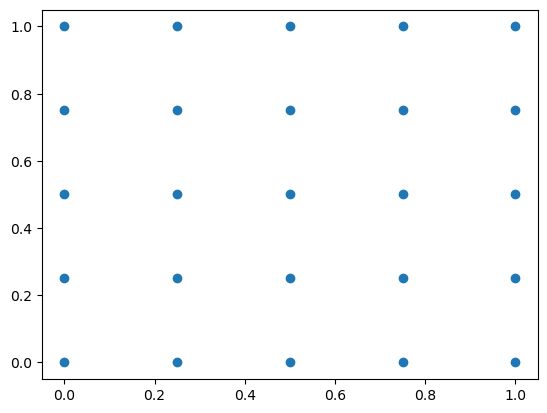

In [5]:
plt.scatter(Uniform_100samples_25anchors_475agents_0Variance_labels[0].T[0][:25], Uniform_100samples_25anchors_475agents_0Variance_labels[0].T[1][:25])

#### Generate Agents

In [5]:
np.random.seed(42)

In [6]:
print(np.random.rand())

0.3745401188473625


In [7]:
for k in range(num_sample):
    Uniform_100samples_25anchors_1875agents_0Variance_labels[k].T[0][N_anchors:] = np.random.rand(N_agents9)
    Uniform_100samples_25anchors_1875agents_0Variance_labels[k].T[1][N_anchors:] = np.random.rand(N_agents9)
    # Uniform_100samples_25anchors_975agents_0Variance_labels[k].T[0][N_anchors:] = np.random.rand(N_agents1)
    # Uniform_100samples_25anchors_975agents_0Variance_labels[k].T[1][N_anchors:] = np.random.rand(N_agents1)
    # Uniform_100samples_25anchors_2975agents_0Variance_labels[k].T[0][N_anchors:] = np.random.rand(N_agents2)
    # Uniform_100samples_25anchors_2975agents_0Variance_labels[k].T[1][N_anchors:] = np.random.rand(N_agents2)

In [7]:
for k in range(num_sample):
    #
    Uniform_100samples_25anchors_75agents_0Variance_labels[k].T[0][N_anchors:] = np.random.rand(N_agents0)
    Uniform_100samples_25anchors_75agents_0Variance_labels[k].T[1][N_anchors:] = np.random.rand(N_agents0)
    Uniform_100samples_25anchors_275agents_0Variance_labels[k].T[0][N_anchors:N0] = Uniform_100samples_25anchors_75agents_0Variance_labels[k].T[0][N_anchors:]
    Uniform_100samples_25anchors_275agents_0Variance_labels[k].T[1][N_anchors:N0] = Uniform_100samples_25anchors_75agents_0Variance_labels[k].T[1][N_anchors:]
    Uniform_100samples_25anchors_475agents_0Variance_labels[k].T[0][N_anchors:N0] = Uniform_100samples_25anchors_75agents_0Variance_labels[k].T[0][N_anchors:]
    Uniform_100samples_25anchors_475agents_0Variance_labels[k].T[1][N_anchors:N0] = Uniform_100samples_25anchors_75agents_0Variance_labels[k].T[1][N_anchors:]
    Uniform_100samples_25anchors_675agents_0Variance_labels[k].T[0][N_anchors:N0] = Uniform_100samples_25anchors_75agents_0Variance_labels[k].T[0][N_anchors:]
    Uniform_100samples_25anchors_675agents_0Variance_labels[k].T[1][N_anchors:N0] = Uniform_100samples_25anchors_75agents_0Variance_labels[k].T[1][N_anchors:]
    Uniform_100samples_25anchors_875agents_0Variance_labels[k].T[0][N_anchors:N0] = Uniform_100samples_25anchors_75agents_0Variance_labels[k].T[0][N_anchors:]
    Uniform_100samples_25anchors_875agents_0Variance_labels[k].T[1][N_anchors:N0] = Uniform_100samples_25anchors_75agents_0Variance_labels[k].T[1][N_anchors:]
    Uniform_100samples_25anchors_1075agents_0Variance_labels[k].T[0][N_anchors:N0] = Uniform_100samples_25anchors_75agents_0Variance_labels[k].T[0][N_anchors:]
    Uniform_100samples_25anchors_1075agents_0Variance_labels[k].T[1][N_anchors:N0] = Uniform_100samples_25anchors_75agents_0Variance_labels[k].T[1][N_anchors:]
    Uniform_100samples_25anchors_1275agents_0Variance_labels[k].T[0][N_anchors:N0] = Uniform_100samples_25anchors_75agents_0Variance_labels[k].T[0][N_anchors:]
    Uniform_100samples_25anchors_1275agents_0Variance_labels[k].T[1][N_anchors:N0] = Uniform_100samples_25anchors_75agents_0Variance_labels[k].T[1][N_anchors:]
    Uniform_100samples_25anchors_1475agents_0Variance_labels[k].T[0][N_anchors:N0] = Uniform_100samples_25anchors_75agents_0Variance_labels[k].T[0][N_anchors:]
    Uniform_100samples_25anchors_1475agents_0Variance_labels[k].T[1][N_anchors:N0] = Uniform_100samples_25anchors_75agents_0Variance_labels[k].T[1][N_anchors:]
    Uniform_100samples_25anchors_1675agents_0Variance_labels[k].T[0][N_anchors:N0] = Uniform_100samples_25anchors_75agents_0Variance_labels[k].T[0][N_anchors:]
    Uniform_100samples_25anchors_1675agents_0Variance_labels[k].T[1][N_anchors:N0] = Uniform_100samples_25anchors_75agents_0Variance_labels[k].T[1][N_anchors:]
    #
    Uniform_100samples_25anchors_275agents_0Variance_labels[k].T[0][N0:N1] = np.random.rand(200)
    Uniform_100samples_25anchors_275agents_0Variance_labels[k].T[1][N0:N1] = np.random.rand(200)
    Uniform_100samples_25anchors_475agents_0Variance_labels[k].T[0][N0:N1] = Uniform_100samples_25anchors_275agents_0Variance_labels[k].T[0][N0:N1]
    Uniform_100samples_25anchors_475agents_0Variance_labels[k].T[1][N0:N1] = Uniform_100samples_25anchors_275agents_0Variance_labels[k].T[1][N0:N1]
    Uniform_100samples_25anchors_675agents_0Variance_labels[k].T[0][N0:N1] = Uniform_100samples_25anchors_275agents_0Variance_labels[k].T[0][N0:N1]
    Uniform_100samples_25anchors_675agents_0Variance_labels[k].T[1][N0:N1] = Uniform_100samples_25anchors_275agents_0Variance_labels[k].T[1][N0:N1]
    Uniform_100samples_25anchors_875agents_0Variance_labels[k].T[0][N0:N1] = Uniform_100samples_25anchors_275agents_0Variance_labels[k].T[0][N0:N1]
    Uniform_100samples_25anchors_875agents_0Variance_labels[k].T[1][N0:N1] = Uniform_100samples_25anchors_275agents_0Variance_labels[k].T[1][N0:N1]
    Uniform_100samples_25anchors_1075agents_0Variance_labels[k].T[0][N0:N1] = Uniform_100samples_25anchors_275agents_0Variance_labels[k].T[0][N0:N1]
    Uniform_100samples_25anchors_1075agents_0Variance_labels[k].T[1][N0:N1] = Uniform_100samples_25anchors_275agents_0Variance_labels[k].T[1][N0:N1]
    Uniform_100samples_25anchors_1275agents_0Variance_labels[k].T[0][N0:N1] = Uniform_100samples_25anchors_275agents_0Variance_labels[k].T[0][N0:N1]
    Uniform_100samples_25anchors_1275agents_0Variance_labels[k].T[1][N0:N1] = Uniform_100samples_25anchors_275agents_0Variance_labels[k].T[1][N0:N1]
    Uniform_100samples_25anchors_1475agents_0Variance_labels[k].T[0][N0:N1] = Uniform_100samples_25anchors_275agents_0Variance_labels[k].T[0][N0:N1]
    Uniform_100samples_25anchors_1475agents_0Variance_labels[k].T[1][N0:N1] = Uniform_100samples_25anchors_275agents_0Variance_labels[k].T[1][N0:N1]
    Uniform_100samples_25anchors_1675agents_0Variance_labels[k].T[0][N0:N1] = Uniform_100samples_25anchors_275agents_0Variance_labels[k].T[0][N0:N1]
    Uniform_100samples_25anchors_1675agents_0Variance_labels[k].T[1][N0:N1] = Uniform_100samples_25anchors_275agents_0Variance_labels[k].T[1][N0:N1]
    #
    Uniform_100samples_25anchors_475agents_0Variance_labels[k].T[0][N1:N2] = np.random.rand(200)
    Uniform_100samples_25anchors_475agents_0Variance_labels[k].T[1][N1:N2] = np.random.rand(200)
    Uniform_100samples_25anchors_675agents_0Variance_labels[k].T[0][N1:N2] = Uniform_100samples_25anchors_475agents_0Variance_labels[k].T[0][N1:N2]
    Uniform_100samples_25anchors_675agents_0Variance_labels[k].T[1][N1:N2] = Uniform_100samples_25anchors_475agents_0Variance_labels[k].T[1][N1:N2]
    Uniform_100samples_25anchors_875agents_0Variance_labels[k].T[0][N1:N2] = Uniform_100samples_25anchors_475agents_0Variance_labels[k].T[0][N1:N2]
    Uniform_100samples_25anchors_875agents_0Variance_labels[k].T[1][N1:N2] = Uniform_100samples_25anchors_475agents_0Variance_labels[k].T[1][N1:N2]
    Uniform_100samples_25anchors_1075agents_0Variance_labels[k].T[0][N1:N2] = Uniform_100samples_25anchors_475agents_0Variance_labels[k].T[0][N1:N2]
    Uniform_100samples_25anchors_1075agents_0Variance_labels[k].T[1][N1:N2] = Uniform_100samples_25anchors_475agents_0Variance_labels[k].T[1][N1:N2]
    Uniform_100samples_25anchors_1275agents_0Variance_labels[k].T[0][N1:N2] = Uniform_100samples_25anchors_475agents_0Variance_labels[k].T[0][N1:N2]
    Uniform_100samples_25anchors_1275agents_0Variance_labels[k].T[1][N1:N2] = Uniform_100samples_25anchors_475agents_0Variance_labels[k].T[1][N1:N2]
    Uniform_100samples_25anchors_1475agents_0Variance_labels[k].T[0][N1:N2] = Uniform_100samples_25anchors_475agents_0Variance_labels[k].T[0][N1:N2]
    Uniform_100samples_25anchors_1475agents_0Variance_labels[k].T[1][N1:N2] = Uniform_100samples_25anchors_475agents_0Variance_labels[k].T[1][N1:N2]
    Uniform_100samples_25anchors_1675agents_0Variance_labels[k].T[0][N1:N2] = Uniform_100samples_25anchors_475agents_0Variance_labels[k].T[0][N1:N2]
    Uniform_100samples_25anchors_1675agents_0Variance_labels[k].T[1][N1:N2] = Uniform_100samples_25anchors_475agents_0Variance_labels[k].T[1][N1:N2]
    #
    Uniform_100samples_25anchors_675agents_0Variance_labels[k].T[0][N2:N3] = np.random.rand(200)
    Uniform_100samples_25anchors_675agents_0Variance_labels[k].T[1][N2:N3] = np.random.rand(200)
    Uniform_100samples_25anchors_875agents_0Variance_labels[k].T[0][N2:N3] = Uniform_100samples_25anchors_675agents_0Variance_labels[k].T[0][N2:N3]
    Uniform_100samples_25anchors_875agents_0Variance_labels[k].T[1][N2:N3] = Uniform_100samples_25anchors_675agents_0Variance_labels[k].T[1][N2:N3]
    Uniform_100samples_25anchors_1075agents_0Variance_labels[k].T[0][N2:N3] = Uniform_100samples_25anchors_675agents_0Variance_labels[k].T[0][N2:N3]
    Uniform_100samples_25anchors_1075agents_0Variance_labels[k].T[1][N2:N3] = Uniform_100samples_25anchors_675agents_0Variance_labels[k].T[1][N2:N3]
    Uniform_100samples_25anchors_1275agents_0Variance_labels[k].T[0][N2:N3] = Uniform_100samples_25anchors_675agents_0Variance_labels[k].T[0][N2:N3]
    Uniform_100samples_25anchors_1275agents_0Variance_labels[k].T[1][N2:N3] = Uniform_100samples_25anchors_675agents_0Variance_labels[k].T[1][N2:N3]
    Uniform_100samples_25anchors_1475agents_0Variance_labels[k].T[0][N2:N3] = Uniform_100samples_25anchors_675agents_0Variance_labels[k].T[0][N2:N3]
    Uniform_100samples_25anchors_1475agents_0Variance_labels[k].T[1][N2:N3] = Uniform_100samples_25anchors_675agents_0Variance_labels[k].T[1][N2:N3]
    Uniform_100samples_25anchors_1675agents_0Variance_labels[k].T[0][N2:N3] = Uniform_100samples_25anchors_675agents_0Variance_labels[k].T[0][N2:N3]
    Uniform_100samples_25anchors_1675agents_0Variance_labels[k].T[1][N2:N3] = Uniform_100samples_25anchors_675agents_0Variance_labels[k].T[1][N2:N3]
    #
    Uniform_100samples_25anchors_875agents_0Variance_labels[k].T[0][N3:N4] = np.random.rand(200)
    Uniform_100samples_25anchors_875agents_0Variance_labels[k].T[1][N3:N4] = np.random.rand(200)
    Uniform_100samples_25anchors_1075agents_0Variance_labels[k].T[0][N3:N4] = Uniform_100samples_25anchors_875agents_0Variance_labels[k].T[0][N3:N4]
    Uniform_100samples_25anchors_1075agents_0Variance_labels[k].T[1][N3:N4] = Uniform_100samples_25anchors_875agents_0Variance_labels[k].T[1][N3:N4]
    Uniform_100samples_25anchors_1275agents_0Variance_labels[k].T[0][N3:N4] = Uniform_100samples_25anchors_875agents_0Variance_labels[k].T[0][N3:N4]
    Uniform_100samples_25anchors_1275agents_0Variance_labels[k].T[1][N3:N4] = Uniform_100samples_25anchors_875agents_0Variance_labels[k].T[1][N3:N4]
    Uniform_100samples_25anchors_1475agents_0Variance_labels[k].T[0][N3:N4] = Uniform_100samples_25anchors_875agents_0Variance_labels[k].T[0][N3:N4]
    Uniform_100samples_25anchors_1475agents_0Variance_labels[k].T[1][N3:N4] = Uniform_100samples_25anchors_875agents_0Variance_labels[k].T[1][N3:N4]
    Uniform_100samples_25anchors_1675agents_0Variance_labels[k].T[0][N3:N4] = Uniform_100samples_25anchors_875agents_0Variance_labels[k].T[0][N3:N4]
    Uniform_100samples_25anchors_1675agents_0Variance_labels[k].T[1][N3:N4] = Uniform_100samples_25anchors_875agents_0Variance_labels[k].T[1][N3:N4]
    #
    Uniform_100samples_25anchors_1075agents_0Variance_labels[k].T[0][N4:N5] = np.random.rand(200)
    Uniform_100samples_25anchors_1075agents_0Variance_labels[k].T[1][N4:N5] = np.random.rand(200)
    Uniform_100samples_25anchors_1275agents_0Variance_labels[k].T[0][N4:N5] = Uniform_100samples_25anchors_1075agents_0Variance_labels[k].T[0][N4:N5]
    Uniform_100samples_25anchors_1275agents_0Variance_labels[k].T[1][N4:N5] = Uniform_100samples_25anchors_1075agents_0Variance_labels[k].T[1][N4:N5]
    Uniform_100samples_25anchors_1475agents_0Variance_labels[k].T[0][N4:N5] = Uniform_100samples_25anchors_1075agents_0Variance_labels[k].T[0][N4:N5]
    Uniform_100samples_25anchors_1475agents_0Variance_labels[k].T[1][N4:N5] = Uniform_100samples_25anchors_1075agents_0Variance_labels[k].T[1][N4:N5]
    Uniform_100samples_25anchors_1675agents_0Variance_labels[k].T[0][N4:N5] = Uniform_100samples_25anchors_1075agents_0Variance_labels[k].T[0][N4:N5]
    Uniform_100samples_25anchors_1675agents_0Variance_labels[k].T[1][N4:N5] = Uniform_100samples_25anchors_1075agents_0Variance_labels[k].T[1][N4:N5]
    #
    Uniform_100samples_25anchors_1275agents_0Variance_labels[k].T[0][N5:N6] = np.random.rand(200)
    Uniform_100samples_25anchors_1275agents_0Variance_labels[k].T[1][N5:N6] = np.random.rand(200)
    Uniform_100samples_25anchors_1475agents_0Variance_labels[k].T[0][N5:N6] = Uniform_100samples_25anchors_1275agents_0Variance_labels[k].T[0][N5:N6]
    Uniform_100samples_25anchors_1475agents_0Variance_labels[k].T[1][N5:N6] = Uniform_100samples_25anchors_1275agents_0Variance_labels[k].T[1][N5:N6]
    Uniform_100samples_25anchors_1675agents_0Variance_labels[k].T[0][N5:N6] = Uniform_100samples_25anchors_1275agents_0Variance_labels[k].T[0][N5:N6]
    Uniform_100samples_25anchors_1675agents_0Variance_labels[k].T[1][N5:N6] = Uniform_100samples_25anchors_1275agents_0Variance_labels[k].T[1][N5:N6]
    #
    Uniform_100samples_25anchors_1475agents_0Variance_labels[k].T[0][N6:N7] = np.random.rand(200)
    Uniform_100samples_25anchors_1475agents_0Variance_labels[k].T[1][N6:N7] = np.random.rand(200)
    Uniform_100samples_25anchors_1675agents_0Variance_labels[k].T[0][N6:N7] = Uniform_100samples_25anchors_1475agents_0Variance_labels[k].T[0][N6:N7]
    Uniform_100samples_25anchors_1675agents_0Variance_labels[k].T[1][N6:N7] = Uniform_100samples_25anchors_1475agents_0Variance_labels[k].T[0][N6:N7]
    #
    Uniform_100samples_25anchors_1675agents_0Variance_labels[k].T[0][N7:N8] = np.random.rand(200)
    Uniform_100samples_25anchors_1675agents_0Variance_labels[k].T[1][N7:N8] = np.random.rand(200)

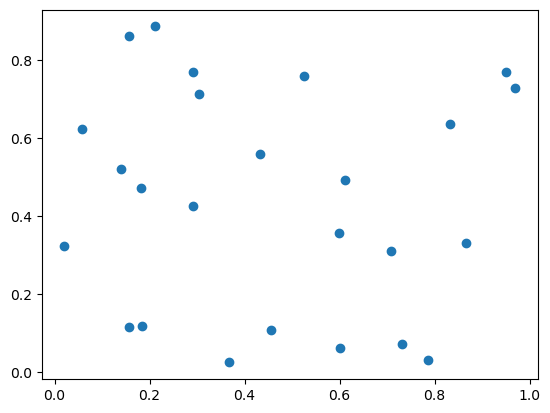

In [8]:
plt.scatter(Uniform_100samples_25anchors_475agents_0Variance_labels[0].T[0][25:50], Uniform_100samples_25anchors_475agents_0Variance_labels[0].T[1][25:50])

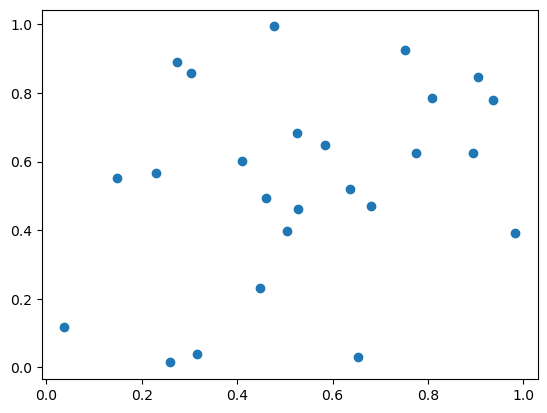

In [9]:
plt.scatter(Uniform_100samples_25anchors_475agents_0Variance_labels[3].T[0][25:50], Uniform_100samples_25anchors_475agents_0Variance_labels[3].T[1][25:50])

### Distance Generation

In [13]:
def compute_distance_matrix(points):
    diff = points[:, np.newaxis, :] - points[np.newaxis, :, :]
    dist_matrix = np.sqrt(np.sum(diff**2, axis=-1)) 
    return dist_matrix

def compute_distance_matrix_noise(points, mean, var):
    diff = points[:, np.newaxis, :] - points[np.newaxis, :, :]
    dist_matrix = np.sqrt(np.sum(diff**2, axis=-1)) 
    dist_matrix_noise = dist_matrix + np.random.normal(loc=mean, scale=np.sqrt(var), size=dist_matrix.shape) * dist_matrix
    return dist_matrix_noise

#### Initialization

Without Noise

In [11]:
Uniform_100samples_25anchors_75agents_0Variance_dist = np.zeros((num_sample, N0, N0))
Uniform_100samples_25anchors_275agents_0Variance_dist = np.zeros((num_sample, N1, N1))
Uniform_100samples_25anchors_475agents_0Variance_dist = np.zeros((num_sample, N2, N2))
Uniform_100samples_25anchors_675agents_0Variance_dist = np.zeros((num_sample, N3, N3))
Uniform_100samples_25anchors_875agents_0Variance_dist = np.zeros((num_sample, N4, N4))
Uniform_100samples_25anchors_1075agents_0Variance_dist = np.zeros((num_sample, N5, N5))
Uniform_100samples_25anchors_1275agents_0Variance_dist = np.zeros((num_sample, N6, N6))
Uniform_100samples_25anchors_1475agents_0Variance_dist = np.zeros((num_sample, N7, N7))
Uniform_100samples_25anchors_1675agents_0Variance_dist = np.zeros((num_sample, N8, N8))

In [8]:
Uniform_100samples_25anchors_1875agents_0Variance_dist = np.zeros((num_sample, N9, N9))

Small Noise 0.0025

In [12]:
Uniform_100samples_25anchors_75agents_00025Variance_dist = np.zeros((100, N0, N0))
Uniform_100samples_25anchors_275agents_00025Variance_dist = np.zeros((100, N1, N1))
Uniform_100samples_25anchors_475agents_00025Variance_dist = np.zeros((100, N2, N2))
Uniform_100samples_25anchors_675agents_00025Variance_dist = np.zeros((100, N3, N3))
Uniform_100samples_25anchors_875agents_00025Variance_dist = np.zeros((100, N4, N4))
Uniform_100samples_25anchors_1075agents_00025Variance_dist = np.zeros((100, N5, N5))
Uniform_100samples_25anchors_1275agents_00025Variance_dist = np.zeros((100, N6, N6))
Uniform_100samples_25anchors_1475agents_00025Variance_dist = np.zeros((100, N7, N7))
Uniform_100samples_25anchors_1675agents_00025Variance_dist = np.zeros((100, N8, N8))

In [9]:
Uniform_100samples_25anchors_1875agents_00025Variance_dist = np.zeros((num_sample, N9, N9))

Medium Noise 0.0225

In [13]:
Uniform_100samples_25anchors_75agents_00225Variance_dist = np.zeros((100, N0, N0))
Uniform_100samples_25anchors_275agents_00225Variance_dist = np.zeros((100, N1, N1))
Uniform_100samples_25anchors_475agents_00225Variance_dist = np.zeros((100, N2, N2))
Uniform_100samples_25anchors_675agents_00225Variance_dist = np.zeros((100, N3, N3))
Uniform_100samples_25anchors_875agents_00225Variance_dist = np.zeros((100, N4, N4))
Uniform_100samples_25anchors_1075agents_00225Variance_dist = np.zeros((100, N5, N5))
Uniform_100samples_25anchors_1275agents_00225Variance_dist = np.zeros((100, N6, N6))
Uniform_100samples_25anchors_1475agents_00225Variance_dist = np.zeros((100, N7, N7))
Uniform_100samples_25anchors_1675agents_00225Variance_dist = np.zeros((100, N8, N8))

In [10]:
Uniform_100samples_25anchors_1875agents_00225Variance_dist = np.zeros((num_sample, N9, N9))

Large Noise 0.0625

In [14]:
Uniform_100samples_25anchors_75agents_00625Variance_dist = np.zeros((100, N0, N0))
Uniform_100samples_25anchors_275agents_00625Variance_dist = np.zeros((100, N1, N1))
Uniform_100samples_25anchors_475agents_00625Variance_dist = np.zeros((100, N2, N2))
Uniform_100samples_25anchors_675agents_00625Variance_dist = np.zeros((100, N3, N3))
Uniform_100samples_25anchors_875agents_00625Variance_dist = np.zeros((100, N4, N4))
Uniform_100samples_25anchors_1075agents_00625Variance_dist = np.zeros((100, N5, N5))
Uniform_100samples_25anchors_1275agents_00625Variance_dist = np.zeros((100, N6, N6))
Uniform_100samples_25anchors_1475agents_00625Variance_dist = np.zeros((100, N7, N7))
Uniform_100samples_25anchors_1675agents_00625Variance_dist = np.zeros((100, N8, N8))

In [18]:
Uniform_100samples_25anchors_475agents_004Variance_dist = np.zeros((100, N2, N2))

In [11]:
Uniform_100samples_25anchors_1875agents_00625Variance_dist = np.zeros((num_sample, N9, N9))

#### Compute the diatance matrices

In [10]:
for k in range(num_sample):
    Uniform_100samples_25anchors_475agents_0Variance_dist[k] = compute_distance_matrix(Uniform_100samples_25anchors_475agents_0Variance_labels[k])
    Uniform_100samples_25anchors_975agents_0Variance_dist[k] = compute_distance_matrix(Uniform_100samples_25anchors_975agents_0Variance_labels[k])
    Uniform_100samples_25anchors_2975agents_0Variance_dist[k] = compute_distance_matrix(Uniform_100samples_25anchors_2975agents_0Variance_labels[k])

In [14]:
for k in range(num_sample):
    # Without Noise
    # Uniform_100samples_25anchors_75agents_0Variance_dist[k] = compute_distance_matrix(Uniform_100samples_25anchors_75agents_0Variance_labels[k])
    # Uniform_100samples_25anchors_275agents_0Variance_dist[k] = compute_distance_matrix(Uniform_100samples_25anchors_275agents_0Variance_labels[k])
    # Uniform_100samples_25anchors_475agents_0Variance_dist[k] = compute_distance_matrix(Uniform_100samples_25anchors_475agents_0Variance_labels[k])
    # Uniform_100samples_25anchors_675agents_0Variance_dist[k] = compute_distance_matrix(Uniform_100samples_25anchors_675agents_0Variance_labels[k])
    # Uniform_100samples_25anchors_875agents_0Variance_dist[k] = compute_distance_matrix(Uniform_100samples_25anchors_875agents_0Variance_labels[k])
    # Uniform_100samples_25anchors_1075agents_0Variance_dist[k] = compute_distance_matrix(Uniform_100samples_25anchors_1075agents_0Variance_labels[k])
    # Uniform_100samples_25anchors_1275agents_0Variance_dist[k] = compute_distance_matrix(Uniform_100samples_25anchors_1275agents_0Variance_labels[k])
    # Uniform_100samples_25anchors_1475agents_0Variance_dist[k] = compute_distance_matrix(Uniform_100samples_25anchors_1475agents_0Variance_labels[k])
    # Uniform_100samples_25anchors_1675agents_0Variance_dist[k] = compute_distance_matrix(Uniform_100samples_25anchors_1675agents_0Variance_labels[k])
    Uniform_100samples_25anchors_1875agents_0Variance_dist[k] = compute_distance_matrix(Uniform_100samples_25anchors_1875agents_0Variance_labels[k])
    # Small noise 0.0025
    # Uniform_100samples_25anchors_75agents_00025Variance_dist[k] = compute_distance_matrix_noise(Uniform_100samples_25anchors_75agents_0Variance_labels[k], 0.0, 0.0025)
    # Uniform_100samples_25anchors_275agents_00025Variance_dist[k] = compute_distance_matrix_noise(Uniform_100samples_25anchors_275agents_0Variance_labels[k], 0.0, 0.0025)
    # Uniform_100samples_25anchors_475agents_00025Variance_dist[k] = compute_distance_matrix_noise(Uniform_100samples_25anchors_475agents_0Variance_labels[k], 0.0, 0.0025)
    # Uniform_100samples_25anchors_675agents_00025Variance_dist[k] = compute_distance_matrix_noise(Uniform_100samples_25anchors_675agents_0Variance_labels[k], 0.0, 0.0025)
    # Uniform_100samples_25anchors_875agents_00025Variance_dist[k] = compute_distance_matrix_noise(Uniform_100samples_25anchors_875agents_0Variance_labels[k], 0.0, 0.0025)
    # Uniform_100samples_25anchors_1075agents_00025Variance_dist[k] = compute_distance_matrix_noise(Uniform_100samples_25anchors_1075agents_0Variance_labels[k], 0.0, 0.0025)
    # Uniform_100samples_25anchors_1275agents_00025Variance_dist[k] = compute_distance_matrix_noise(Uniform_100samples_25anchors_1275agents_0Variance_labels[k], 0.0, 0.0025)
    # Uniform_100samples_25anchors_1475agents_00025Variance_dist[k] = compute_distance_matrix_noise(Uniform_100samples_25anchors_1475agents_0Variance_labels[k], 0.0, 0.0025)
    # Uniform_100samples_25anchors_1675agents_00025Variance_dist[k] = compute_distance_matrix_noise(Uniform_100samples_25anchors_1675agents_0Variance_labels[k], 0.0, 0.0025)
    Uniform_100samples_25anchors_1875agents_00025Variance_dist[k] = compute_distance_matrix_noise(Uniform_100samples_25anchors_1875agents_0Variance_labels[k], 0.0, 0.0025)
    # Medium Noise 0.0225
    # Uniform_100samples_25anchors_75agents_00225Variance_dist[k] = compute_distance_matrix_noise(Uniform_100samples_25anchors_75agents_0Variance_labels[k], 0.0, 0.0225)
    # Uniform_100samples_25anchors_275agents_00225Variance_dist[k] = compute_distance_matrix_noise(Uniform_100samples_25anchors_275agents_0Variance_labels[k], 0.0, 0.0225)
    # Uniform_100samples_25anchors_475agents_00225Variance_dist[k] = compute_distance_matrix_noise(Uniform_100samples_25anchors_475agents_0Variance_labels[k], 0.0, 0.0225)
    # Uniform_100samples_25anchors_675agents_00225Variance_dist[k] = compute_distance_matrix_noise(Uniform_100samples_25anchors_675agents_0Variance_labels[k], 0.0, 0.0225)
    # Uniform_100samples_25anchors_875agents_00225Variance_dist[k] = compute_distance_matrix_noise(Uniform_100samples_25anchors_875agents_0Variance_labels[k], 0.0, 0.0225)
    # Uniform_100samples_25anchors_1075agents_00225Variance_dist[k] = compute_distance_matrix_noise(Uniform_100samples_25anchors_1075agents_0Variance_labels[k], 0.0, 0.0225)
    # Uniform_100samples_25anchors_1275agents_00225Variance_dist[k] = compute_distance_matrix_noise(Uniform_100samples_25anchors_1275agents_0Variance_labels[k], 0.0, 0.0225)
    # Uniform_100samples_25anchors_1475agents_00225Variance_dist[k] = compute_distance_matrix_noise(Uniform_100samples_25anchors_1475agents_0Variance_labels[k], 0.0, 0.0225)
    # Uniform_100samples_25anchors_1675agents_00225Variance_dist[k] = compute_distance_matrix_noise(Uniform_100samples_25anchors_1675agents_0Variance_labels[k], 0.0, 0.0225)
    Uniform_100samples_25anchors_1875agents_00225Variance_dist[k] = compute_distance_matrix_noise(Uniform_100samples_25anchors_1875agents_0Variance_labels[k], 0.0, 0.0225)
    # Large Noise 0.0625
    # Uniform_100samples_25anchors_75agents_00625Variance_dist[k] = compute_distance_matrix_noise(Uniform_100samples_25anchors_75agents_0Variance_labels[k], 0.0, 0.0625)
    # Uniform_100samples_25anchors_275agents_00625Variance_dist[k] = compute_distance_matrix_noise(Uniform_100samples_25anchors_275agents_0Variance_labels[k], 0.0, 0.0625)
    # Uniform_100samples_25anchors_475agents_00625Variance_dist[k] = compute_distance_matrix_noise(Uniform_100samples_25anchors_475agents_0Variance_labels[k], 0.0, 0.0625)
    # Uniform_100samples_25anchors_675agents_00625Variance_dist[k] = compute_distance_matrix_noise(Uniform_100samples_25anchors_675agents_0Variance_labels[k], 0.0, 0.0625)
    # Uniform_100samples_25anchors_875agents_00625Variance_dist[k] = compute_distance_matrix_noise(Uniform_100samples_25anchors_875agents_0Variance_labels[k], 0.0, 0.0625)
    # Uniform_100samples_25anchors_1075agents_00625Variance_dist[k] = compute_distance_matrix_noise(Uniform_100samples_25anchors_1075agents_0Variance_labels[k], 0.0, 0.0625)
    # Uniform_100samples_25anchors_1275agents_00625Variance_dist[k] = compute_distance_matrix_noise(Uniform_100samples_25anchors_1275agents_0Variance_labels[k], 0.0, 0.0625)
    # Uniform_100samples_25anchors_1475agents_00625Variance_dist[k] = compute_distance_matrix_noise(Uniform_100samples_25anchors_1475agents_0Variance_labels[k], 0.0, 0.0625)
    # Uniform_100samples_25anchors_1675agents_00625Variance_dist[k] = compute_distance_matrix_noise(Uniform_100samples_25anchors_1675agents_0Variance_labels[k], 0.0, 0.0625)
    Uniform_100samples_25anchors_1875agents_00625Variance_dist[k] = compute_distance_matrix_noise(Uniform_100samples_25anchors_1875agents_0Variance_labels[k], 0.0, 0.0625)
    

In [19]:
for k in range(num_sample):
    Uniform_100samples_25anchors_475agents_004Variance_dist[k] = compute_distance_matrix_noise(Uniform_100samples_25anchors_475agents_0Variance_labels[k], 0.0, 0.04)

### Save the Data

In [ ]:
# savemat('Uniform_1samples_25anchors_475agents_0Variance.mat', {'labels': Uniform_100samples_25anchors_475agents_0Variance_labels, 'dist': Uniform_100samples_25anchors_475agents_0Variance_dist, 'range': Uniform_100samples_25anchors_475agents_0Variance_dist, 'N_anchors': N_anchors, 'N_agents': N_agents0})
# savemat('Uniform_1samples_25anchors_975agents_0Variance.mat', {'labels': Uniform_100samples_25anchors_975agents_0Variance_labels, 'dist': Uniform_100samples_25anchors_975agents_0Variance_dist, 'range': Uniform_100samples_25anchors_975agents_0Variance_dist, 'N_anchors': N_anchors, 'N_agents': N_agents1})
savemat('Uniform_1samples_25anchors_2975agents_0Variance.mat', {'labels': Uniform_100samples_25anchors_2975agents_0Variance_labels, 'dist': Uniform_100samples_25anchors_2975agents_0Variance_dist, 'range': Uniform_100samples_25anchors_2975agents_0Variance_dist, 'N_anchors': N_anchors, 'N_agents': N_agents2})

In [15]:
# Without Noise
# savemat('Uniform_100samples_25anchors_75agents_0Variance.mat', {'labels': Uniform_100samples_25anchors_75agents_0Variance_labels, 'dist': Uniform_100samples_25anchors_75agents_0Variance_dist, 'range': Uniform_100samples_25anchors_75agents_0Variance_dist, 'N_anchors': N_anchors, 'N_agents': N_agents0})
# savemat('Uniform_100samples_25anchors_275agents_0Variance.mat', {'labels': Uniform_100samples_25anchors_275agents_0Variance_labels, 'dist': Uniform_100samples_25anchors_275agents_0Variance_dist, 'range': Uniform_100samples_25anchors_275agents_0Variance_dist, 'N_anchors': N_anchors, 'N_agents': N_agents1})
# savemat('Uniform_100samples_25anchors_475agents_0Variance.mat', {'labels': Uniform_100samples_25anchors_475agents_0Variance_labels, 'dist': Uniform_100samples_25anchors_475agents_0Variance_dist, 'range': Uniform_100samples_25anchors_475agents_0Variance_dist, 'N_anchors': N_anchors, 'N_agents': N_agents2})
# savemat('Uniform_100samples_25anchors_675agents_0Variance.mat', {'labels': Uniform_100samples_25anchors_675agents_0Variance_labels, 'dist': Uniform_100samples_25anchors_675agents_0Variance_dist, 'range': Uniform_100samples_25anchors_675agents_0Variance_dist, 'N_anchors': N_anchors, 'N_agents': N_agents3})
# savemat('Uniform_100samples_25anchors_875agents_0Variance.mat', {'labels': Uniform_100samples_25anchors_875agents_0Variance_labels, 'dist': Uniform_100samples_25anchors_875agents_0Variance_dist, 'range': Uniform_100samples_25anchors_875agents_0Variance_dist, 'N_anchors': N_anchors, 'N_agents': N_agents4})
# savemat('Uniform_100samples_25anchors_1075agents_0Variance.mat', {'labels': Uniform_100samples_25anchors_1075agents_0Variance_labels, 'dist': Uniform_100samples_25anchors_1075agents_0Variance_dist, 'range': Uniform_100samples_25anchors_1075agents_0Variance_dist, 'N_anchors': N_anchors, 'N_agents': N_agents5})
# savemat('Uniform_100samples_25anchors_1275agents_0Variance.mat', {'labels': Uniform_100samples_25anchors_1275agents_0Variance_labels, 'dist': Uniform_100samples_25anchors_1275agents_0Variance_dist, 'range': Uniform_100samples_25anchors_1275agents_0Variance_dist, 'N_anchors': N_anchors, 'N_agents': N_agents6})
# savemat('Uniform_100samples_25anchors_1475agents_0Variance.mat', {'labels': Uniform_100samples_25anchors_1475agents_0Variance_labels, 'dist': Uniform_100samples_25anchors_1475agents_0Variance_dist, 'range': Uniform_100samples_25anchors_1475agents_0Variance_dist, 'N_anchors': N_anchors, 'N_agents': N_agents7})
# savemat('Uniform_100samples_25anchors_1675agents_0Variance.mat', {'labels': Uniform_100samples_25anchors_1675agents_0Variance_labels, 'dist': Uniform_100samples_25anchors_1675agents_0Variance_dist, 'range': Uniform_100samples_25anchors_1675agents_0Variance_dist, 'N_anchors': N_anchors, 'N_agents': N_agents8})
savemat('Uniform_100samples_25anchors_1875agents_0Variance.mat', {'labels': Uniform_100samples_25anchors_1875agents_0Variance_labels, 'dist': Uniform_100samples_25anchors_1875agents_0Variance_dist, 'range': Uniform_100samples_25anchors_1875agents_0Variance_dist, 'N_anchors': N_anchors, 'N_agents': N_agents9})
# Small noise 0.0025
# savemat('Uniform_100samples_25anchors_75agents_00025Variance.mat', {'labels': Uniform_100samples_25anchors_75agents_0Variance_labels, 'dist': Uniform_100samples_25anchors_75agents_0Variance_dist, 'range': Uniform_100samples_25anchors_75agents_00025Variance_dist, 'N_anchors': N_anchors, 'N_agents': N_agents0})
# savemat('Uniform_100samples_25anchors_275agents_00025Variance.mat', {'labels': Uniform_100samples_25anchors_275agents_0Variance_labels, 'dist': Uniform_100samples_25anchors_275agents_0Variance_dist, 'range': Uniform_100samples_25anchors_275agents_00025Variance_dist, 'N_anchors': N_anchors, 'N_agents': N_agents1})
# savemat('Uniform_100samples_25anchors_475agents_00025Variance.mat', {'labels': Uniform_100samples_25anchors_475agents_0Variance_labels, 'dist': Uniform_100samples_25anchors_475agents_0Variance_dist, 'range': Uniform_100samples_25anchors_475agents_00025Variance_dist, 'N_anchors': N_anchors, 'N_agents': N_agents2})
# savemat('Uniform_100samples_25anchors_675agents_00025Variance.mat', {'labels': Uniform_100samples_25anchors_675agents_0Variance_labels, 'dist': Uniform_100samples_25anchors_675agents_0Variance_dist, 'range': Uniform_100samples_25anchors_675agents_00025Variance_dist, 'N_anchors': N_anchors, 'N_agents': N_agents3})
# savemat('Uniform_100samples_25anchors_875agents_00025Variance.mat', {'labels': Uniform_100samples_25anchors_875agents_0Variance_labels, 'dist': Uniform_100samples_25anchors_875agents_0Variance_dist, 'range': Uniform_100samples_25anchors_875agents_00025Variance_dist, 'N_anchors': N_anchors, 'N_agents': N_agents4})
# savemat('Uniform_100samples_25anchors_1075agents_00025Variance.mat', {'labels': Uniform_100samples_25anchors_1075agents_0Variance_labels, 'dist': Uniform_100samples_25anchors_1075agents_0Variance_dist, 'range': Uniform_100samples_25anchors_1075agents_00025Variance_dist, 'N_anchors': N_anchors, 'N_agents': N_agents5})
# savemat('Uniform_100samples_25anchors_1275agents_00025Variance.mat', {'labels': Uniform_100samples_25anchors_1275agents_0Variance_labels, 'dist': Uniform_100samples_25anchors_1275agents_0Variance_dist, 'range': Uniform_100samples_25anchors_1275agents_00025Variance_dist, 'N_anchors': N_anchors, 'N_agents': N_agents6})
# savemat('Uniform_100samples_25anchors_1475agents_00025Variance.mat', {'labels': Uniform_100samples_25anchors_1475agents_0Variance_labels, 'dist': Uniform_100samples_25anchors_1475agents_0Variance_dist, 'range': Uniform_100samples_25anchors_1475agents_00025Variance_dist, 'N_anchors': N_anchors, 'N_agents': N_agents7})
# savemat('Uniform_100samples_25anchors_1675agents_00025Variance.mat', {'labels': Uniform_100samples_25anchors_1675agents_0Variance_labels, 'dist': Uniform_100samples_25anchors_1675agents_0Variance_dist, 'range': Uniform_100samples_25anchors_1675agents_00025Variance_dist, 'N_anchors': N_anchors, 'N_agents': N_agents8})
savemat('Uniform_100samples_25anchors_1875agents_00025Variance.mat', {'labels': Uniform_100samples_25anchors_1875agents_0Variance_labels, 'dist': Uniform_100samples_25anchors_1875agents_0Variance_dist, 'range': Uniform_100samples_25anchors_1875agents_00025Variance_dist, 'N_anchors': N_anchors, 'N_agents': N_agents9})
# Medium noise 0.0225
# savemat('Uniform_100samples_25anchors_75agents_00225Variance.mat', {'labels': Uniform_100samples_25anchors_75agents_0Variance_labels, 'dist': Uniform_100samples_25anchors_75agents_0Variance_dist, 'range': Uniform_100samples_25anchors_75agents_00225Variance_dist, 'N_anchors': N_anchors, 'N_agents': N_agents0})
# savemat('Uniform_100samples_25anchors_275agents_00225Variance.mat', {'labels': Uniform_100samples_25anchors_275agents_0Variance_labels, 'dist': Uniform_100samples_25anchors_275agents_0Variance_dist, 'range': Uniform_100samples_25anchors_275agents_00225Variance_dist, 'N_anchors': N_anchors, 'N_agents': N_agents1})
# savemat('Uniform_100samples_25anchors_475agents_00225Variance.mat', {'labels': Uniform_100samples_25anchors_475agents_0Variance_labels, 'dist': Uniform_100samples_25anchors_475agents_0Variance_dist, 'range': Uniform_100samples_25anchors_475agents_00225Variance_dist, 'N_anchors': N_anchors, 'N_agents': N_agents2})
# savemat('Uniform_100samples_25anchors_675agents_00225Variance.mat', {'labels': Uniform_100samples_25anchors_675agents_0Variance_labels, 'dist': Uniform_100samples_25anchors_675agents_0Variance_dist, 'range': Uniform_100samples_25anchors_675agents_00225Variance_dist, 'N_anchors': N_anchors, 'N_agents': N_agents3})
# savemat('Uniform_100samples_25anchors_875agents_00225Variance.mat', {'labels': Uniform_100samples_25anchors_875agents_0Variance_labels, 'dist': Uniform_100samples_25anchors_875agents_0Variance_dist, 'range': Uniform_100samples_25anchors_875agents_00225Variance_dist, 'N_anchors': N_anchors, 'N_agents': N_agents4})
# savemat('Uniform_100samples_25anchors_1075agents_00225Variance.mat', {'labels': Uniform_100samples_25anchors_1075agents_0Variance_labels, 'dist': Uniform_100samples_25anchors_1075agents_0Variance_dist, 'range': Uniform_100samples_25anchors_1075agents_00225Variance_dist, 'N_anchors': N_anchors, 'N_agents': N_agents5})
# savemat('Uniform_100samples_25anchors_1275agents_00225Variance.mat', {'labels': Uniform_100samples_25anchors_1275agents_0Variance_labels, 'dist': Uniform_100samples_25anchors_1275agents_0Variance_dist, 'range': Uniform_100samples_25anchors_1275agents_00225Variance_dist, 'N_anchors': N_anchors, 'N_agents': N_agents6})
# savemat('Uniform_100samples_25anchors_1475agents_00225Variance.mat', {'labels': Uniform_100samples_25anchors_1475agents_0Variance_labels, 'dist': Uniform_100samples_25anchors_1475agents_0Variance_dist, 'range': Uniform_100samples_25anchors_1475agents_00225Variance_dist, 'N_anchors': N_anchors, 'N_agents': N_agents7})
# savemat('Uniform_100samples_25anchors_1675agents_00225Variance.mat', {'labels': Uniform_100samples_25anchors_1675agents_0Variance_labels, 'dist': Uniform_100samples_25anchors_1675agents_0Variance_dist, 'range': Uniform_100samples_25anchors_1675agents_00225Variance_dist, 'N_anchors': N_anchors, 'N_agents': N_agents8})
savemat('Uniform_100samples_25anchors_1875agents_00225Variance.mat', {'labels': Uniform_100samples_25anchors_1875agents_0Variance_labels, 'dist': Uniform_100samples_25anchors_1875agents_0Variance_dist, 'range': Uniform_100samples_25anchors_1875agents_00225Variance_dist, 'N_anchors': N_anchors, 'N_agents': N_agents9})
# Large noise 0.0625
# savemat('Uniform_100samples_25anchors_75agents_00625Variance.mat', {'labels': Uniform_100samples_25anchors_75agents_0Variance_labels, 'dist': Uniform_100samples_25anchors_75agents_0Variance_dist, 'range': Uniform_100samples_25anchors_75agents_00625Variance_dist, 'N_anchors': N_anchors, 'N_agents': N_agents0})
# savemat('Uniform_100samples_25anchors_275agents_00625Variance.mat', {'labels': Uniform_100samples_25anchors_275agents_0Variance_labels, 'dist': Uniform_100samples_25anchors_275agents_0Variance_dist, 'range': Uniform_100samples_25anchors_275agents_00625Variance_dist, 'N_anchors': N_anchors, 'N_agents': N_agents1})
# savemat('Uniform_100samples_25anchors_475agents_00625Variance.mat', {'labels': Uniform_100samples_25anchors_475agents_0Variance_labels, 'dist': Uniform_100samples_25anchors_475agents_0Variance_dist, 'range': Uniform_100samples_25anchors_475agents_00625Variance_dist, 'N_anchors': N_anchors, 'N_agents': N_agents2})
# savemat('Uniform_100samples_25anchors_675agents_00625Variance.mat', {'labels': Uniform_100samples_25anchors_675agents_0Variance_labels, 'dist': Uniform_100samples_25anchors_675agents_0Variance_dist, 'range': Uniform_100samples_25anchors_675agents_00625Variance_dist, 'N_anchors': N_anchors, 'N_agents': N_agents3})
# savemat('Uniform_100samples_25anchors_875agents_00625Variance.mat', {'labels': Uniform_100samples_25anchors_875agents_0Variance_labels, 'dist': Uniform_100samples_25anchors_875agents_0Variance_dist, 'range': Uniform_100samples_25anchors_875agents_00625Variance_dist, 'N_anchors': N_anchors, 'N_agents': N_agents4})
# savemat('Uniform_100samples_25anchors_1075agents_00625Variance.mat', {'labels': Uniform_100samples_25anchors_1075agents_0Variance_labels, 'dist': Uniform_100samples_25anchors_1075agents_0Variance_dist, 'range': Uniform_100samples_25anchors_1075agents_00625Variance_dist, 'N_anchors': N_anchors, 'N_agents': N_agents5})
# savemat('Uniform_100samples_25anchors_1275agents_00625Variance.mat', {'labels': Uniform_100samples_25anchors_1275agents_0Variance_labels, 'dist': Uniform_100samples_25anchors_1275agents_0Variance_dist, 'range': Uniform_100samples_25anchors_1275agents_00625Variance_dist, 'N_anchors': N_anchors, 'N_agents': N_agents6})
# savemat('Uniform_100samples_25anchors_1475agents_00625Variance.mat', {'labels': Uniform_100samples_25anchors_1475agents_0Variance_labels, 'dist': Uniform_100samples_25anchors_1475agents_0Variance_dist, 'range': Uniform_100samples_25anchors_1475agents_00625Variance_dist, 'N_anchors': N_anchors, 'N_agents': N_agents7})
# savemat('Uniform_100samples_25anchors_1675agents_00625Variance.mat', {'labels': Uniform_100samples_25anchors_1675agents_0Variance_labels, 'dist': Uniform_100samples_25anchors_1675agents_0Variance_dist, 'range': Uniform_100samples_25anchors_1675agents_00625Variance_dist, 'N_anchors': N_anchors, 'N_agents': N_agents8})
savemat('Uniform_100samples_25anchors_1875agents_00625Variance.mat', {'labels': Uniform_100samples_25anchors_1875agents_0Variance_labels, 'dist': Uniform_100samples_25anchors_1875agents_0Variance_dist, 'range': Uniform_100samples_25anchors_1875agents_00625Variance_dist, 'N_anchors': N_anchors, 'N_agents': N_agents9})

In [17]:
savemat('Uniform_100samples_25anchors_475agents_00625Variance.mat', {'labels': Uniform_100samples_25anchors_475agents_0Variance_labels, 'dist': Uniform_100samples_25anchors_475agents_0Variance_dist, 'range': Uniform_100samples_25anchors_475agents_00625Variance_dist, 'N_anchors': N_anchors, 'N_agents': N_agents2})

In [20]:
savemat('Uniform_100samples_25anchors_475agents_004Variance.mat', {'labels': Uniform_100samples_25anchors_475agents_0Variance_labels, 'dist': Uniform_100samples_25anchors_475agents_0Variance_dist, 'range': Uniform_100samples_25anchors_475agents_004Variance_dist, 'N_anchors': N_anchors, 'N_agents': N_agents2})

In [18]:
savemat('Uniform_100samples_25anchors_275agents_025Variance.mat', {'labels': Uniform_100samples_25anchors_275agents_0Variance_labels, 'dist': Uniform_100samples_25anchors_275agents_0Variance_dist, 'range': Uniform_100samples_25anchors_275agents_025Variance_dist})

# Model under same agents and different anchors

- 475 agents 5 anchors
- 475 agents 10 anchors
- 475 agents 15 anchors
- 475 agents 20 anchors
- 475 agents 25 anchors
- 475 agents 30 anchors

In [2]:
num_sample = 100

N_agents = 475

N_anchors0 = 5
N_anchors1 = 10
N_anchors2 = 15
N_anchors3 = 20
N_anchors4 = 25
N_anchors5 = 30

N0 = N_agents + N_anchors0
N1 = N_agents + N_anchors1
N2 = N_agents + N_anchors2
N3 = N_agents + N_anchors3
N4 = N_agents + N_anchors4
N5 = N_agents + N_anchors5

### Labels Generation

#### Initialization

In [3]:
Uniform_100samples_5anchors_475agents_0Variance_labels = np.zeros((num_sample, N0, 2))
Uniform_100samples_10anchors_475agents_0Variance_labels = np.zeros((num_sample, N1, 2))
Uniform_100samples_15anchors_475agents_0Variance_labels = np.zeros((num_sample, N2, 2))
Uniform_100samples_20anchors_475agents_0Variance_labels = np.zeros((num_sample, N3, 2))
Uniform_100samples_25anchors_475agents_0Variance_labels = np.zeros((num_sample, N4, 2))
Uniform_100samples_30anchors_475agents_0Variance_labels = np.zeros((num_sample, N5, 2))

#### Fix the anchors

##### Agents 5

In [4]:
cnt = 0
for i in range(5):
    for k in range(num_sample):
        Uniform_100samples_5anchors_475agents_0Variance_labels[k][cnt][0] = 1.0 / 4.0 * i
        Uniform_100samples_5anchors_475agents_0Variance_labels[k][cnt][1] = 1.0 / 4.0 * i
    cnt = cnt + 1
        

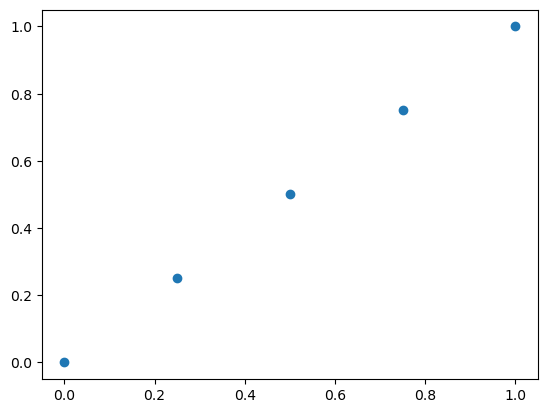

In [5]:
plt.scatter(Uniform_100samples_5anchors_475agents_0Variance_labels[0].T[0][:5], Uniform_100samples_5anchors_475agents_0Variance_labels[0].T[1][:5])

##### Agents 10

In [6]:
cnt = 0
for i in range(5):
    for k in range(num_sample):
        Uniform_100samples_10anchors_475agents_0Variance_labels[k][cnt][0] = 0.25
        Uniform_100samples_10anchors_475agents_0Variance_labels[k][cnt][1] = 1.0 / 4.0 * i
    cnt = cnt + 1

for i in range(5):
    for k in range(num_sample):
        Uniform_100samples_10anchors_475agents_0Variance_labels[k][cnt][0] = 0.75
        Uniform_100samples_10anchors_475agents_0Variance_labels[k][cnt][1] = 1.0 / 4.0 * i
    cnt = cnt + 1
        

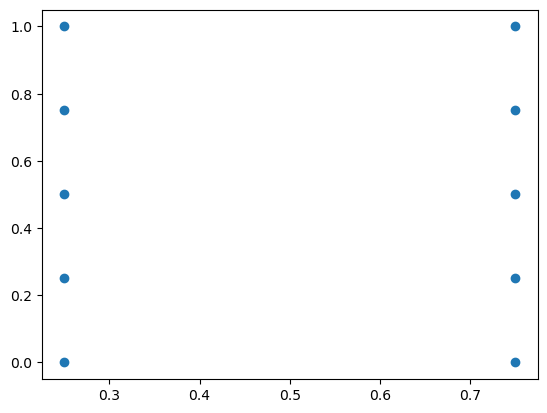

In [7]:
plt.scatter(Uniform_100samples_10anchors_475agents_0Variance_labels[0].T[0][:10], Uniform_100samples_10anchors_475agents_0Variance_labels[0].T[1][:10])

##### Agents 15

In [8]:
cnt = 0
for i in range(5):
    for k in range(num_sample):
        Uniform_100samples_15anchors_475agents_0Variance_labels[k][cnt][0] = 0.0
        Uniform_100samples_15anchors_475agents_0Variance_labels[k][cnt][1] = 1.0 / 4.0 * i
    cnt = cnt + 1

for i in range(5):
    for k in range(num_sample):
        Uniform_100samples_15anchors_475agents_0Variance_labels[k][cnt][0] = 0.5
        Uniform_100samples_15anchors_475agents_0Variance_labels[k][cnt][1] = 1.0 / 4.0 * i
    cnt = cnt + 1
    
for i in range(5):
    for k in range(num_sample):
        Uniform_100samples_15anchors_475agents_0Variance_labels[k][cnt][0] = 1.0
        Uniform_100samples_15anchors_475agents_0Variance_labels[k][cnt][1] = 1.0 / 4.0 * i
    cnt = cnt + 1 

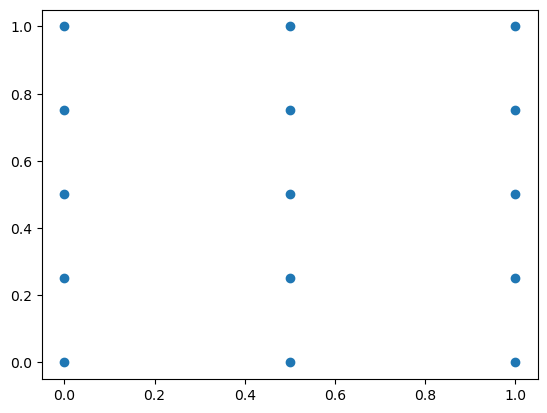

In [9]:
plt.scatter(Uniform_100samples_15anchors_475agents_0Variance_labels[0].T[0][:15], Uniform_100samples_15anchors_475agents_0Variance_labels[0].T[1][:15])

##### Agents 20

In [10]:
cnt = 0
for i in range(5):
    for k in range(num_sample):
        Uniform_100samples_20anchors_475agents_0Variance_labels[k][cnt][0] = 0.0
        Uniform_100samples_20anchors_475agents_0Variance_labels[k][cnt][1] = 1.0 / 4.0 * i
    cnt = cnt + 1

for i in range(5):
    for k in range(num_sample):
        Uniform_100samples_20anchors_475agents_0Variance_labels[k][cnt][0] = 1.0 / 3.
        Uniform_100samples_20anchors_475agents_0Variance_labels[k][cnt][1] = 1.0 / 4.0 * i
    cnt = cnt + 1
    
for i in range(5):
    for k in range(num_sample):
        Uniform_100samples_20anchors_475agents_0Variance_labels[k][cnt][0] = 2.0 / 3.
        Uniform_100samples_20anchors_475agents_0Variance_labels[k][cnt][1] = 1.0 / 4.0 * i
    cnt = cnt + 1
    
for i in range(5):
    for k in range(num_sample):
        Uniform_100samples_20anchors_475agents_0Variance_labels[k][cnt][0] = 1.0
        Uniform_100samples_20anchors_475agents_0Variance_labels[k][cnt][1] = 1.0 / 4.0 * i
    cnt = cnt + 1

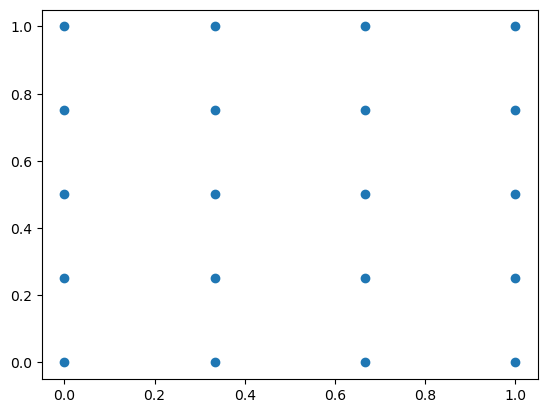

In [11]:
plt.scatter(Uniform_100samples_20anchors_475agents_0Variance_labels[0].T[0][:20], Uniform_100samples_20anchors_475agents_0Variance_labels[0].T[1][:20])

##### Agents 25

In [12]:
cnt = 0
for i in range(5):
    for j in range(5):
        for k in range(num_sample):
            Uniform_100samples_25anchors_475agents_0Variance_labels[k][cnt][0] = 1.0 / 4.0 * i
            Uniform_100samples_25anchors_475agents_0Variance_labels[k][cnt][1] = 1.0 / 4.0 * j
        cnt = cnt + 1

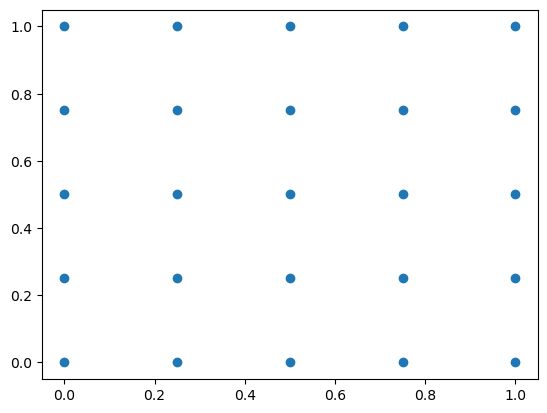

In [13]:
plt.scatter(Uniform_100samples_25anchors_475agents_0Variance_labels[0].T[0][:25], Uniform_100samples_25anchors_475agents_0Variance_labels[0].T[1][:25])

##### Agents 30

In [14]:
cnt = 0
for i in range(5):
    for k in range(num_sample):
        Uniform_100samples_30anchors_475agents_0Variance_labels[k][cnt][0] = 0.0
        Uniform_100samples_30anchors_475agents_0Variance_labels[k][cnt][1] = 1.0 / 4.0 * i
    cnt = cnt + 1

for i in range(5):
    for k in range(num_sample):
        Uniform_100samples_30anchors_475agents_0Variance_labels[k][cnt][0] = 0.2
        Uniform_100samples_30anchors_475agents_0Variance_labels[k][cnt][1] = 1.0 / 4.0 * i
    cnt = cnt + 1
    
for i in range(5):
    for k in range(num_sample):
        Uniform_100samples_30anchors_475agents_0Variance_labels[k][cnt][0] = 0.4
        Uniform_100samples_30anchors_475agents_0Variance_labels[k][cnt][1] = 1.0 / 4.0 * i
    cnt = cnt + 1
    
for i in range(5):
    for k in range(num_sample):
        Uniform_100samples_30anchors_475agents_0Variance_labels[k][cnt][0] = 0.6
        Uniform_100samples_30anchors_475agents_0Variance_labels[k][cnt][1] = 1.0 / 4.0 * i
    cnt = cnt + 1
    
for i in range(5):
    for k in range(num_sample):
        Uniform_100samples_30anchors_475agents_0Variance_labels[k][cnt][0] = 0.8
        Uniform_100samples_30anchors_475agents_0Variance_labels[k][cnt][1] = 1.0 / 4.0 * i
    cnt = cnt + 1
    
for i in range(5):
    for k in range(num_sample):
        Uniform_100samples_30anchors_475agents_0Variance_labels[k][cnt][0] = 1.0
        Uniform_100samples_30anchors_475agents_0Variance_labels[k][cnt][1] = 1.0 / 4.0 * i
    cnt = cnt + 1

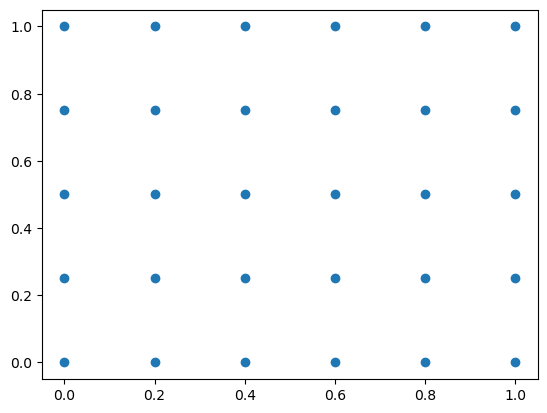

In [15]:
plt.scatter(Uniform_100samples_30anchors_475agents_0Variance_labels[0].T[0][:30], Uniform_100samples_30anchors_475agents_0Variance_labels[0].T[1][:30])

#### Generate Agents

In [16]:
np.random.seed(42)

In [17]:
print(np.random.rand())

0.3745401188473625


In [18]:
for k in range(num_sample):
    #
    Uniform_100samples_5anchors_475agents_0Variance_labels[k].T[0][N_anchors0:] = np.random.rand(N_agents)
    Uniform_100samples_5anchors_475agents_0Variance_labels[k].T[1][N_anchors0:] = np.random.rand(N_agents)

In [19]:
for k in range(num_sample):
    Uniform_100samples_10anchors_475agents_0Variance_labels[k].T[0][N_anchors1:] = Uniform_100samples_5anchors_475agents_0Variance_labels[k].T[0][N_anchors0:]
    Uniform_100samples_10anchors_475agents_0Variance_labels[k].T[1][N_anchors1:] = Uniform_100samples_5anchors_475agents_0Variance_labels[k].T[1][N_anchors0:]
    Uniform_100samples_15anchors_475agents_0Variance_labels[k].T[0][N_anchors2:] = Uniform_100samples_5anchors_475agents_0Variance_labels[k].T[0][N_anchors0:]
    Uniform_100samples_15anchors_475agents_0Variance_labels[k].T[1][N_anchors2:] = Uniform_100samples_5anchors_475agents_0Variance_labels[k].T[1][N_anchors0:]
    Uniform_100samples_20anchors_475agents_0Variance_labels[k].T[0][N_anchors3:] = Uniform_100samples_5anchors_475agents_0Variance_labels[k].T[0][N_anchors0:]
    Uniform_100samples_20anchors_475agents_0Variance_labels[k].T[1][N_anchors3:] = Uniform_100samples_5anchors_475agents_0Variance_labels[k].T[1][N_anchors0:]
    Uniform_100samples_25anchors_475agents_0Variance_labels[k].T[0][N_anchors4:] = Uniform_100samples_5anchors_475agents_0Variance_labels[k].T[0][N_anchors0:]
    Uniform_100samples_25anchors_475agents_0Variance_labels[k].T[1][N_anchors4:] = Uniform_100samples_5anchors_475agents_0Variance_labels[k].T[1][N_anchors0:]
    Uniform_100samples_30anchors_475agents_0Variance_labels[k].T[0][N_anchors5:] = Uniform_100samples_5anchors_475agents_0Variance_labels[k].T[0][N_anchors0:]
    Uniform_100samples_30anchors_475agents_0Variance_labels[k].T[1][N_anchors5:] = Uniform_100samples_5anchors_475agents_0Variance_labels[k].T[1][N_anchors0:]

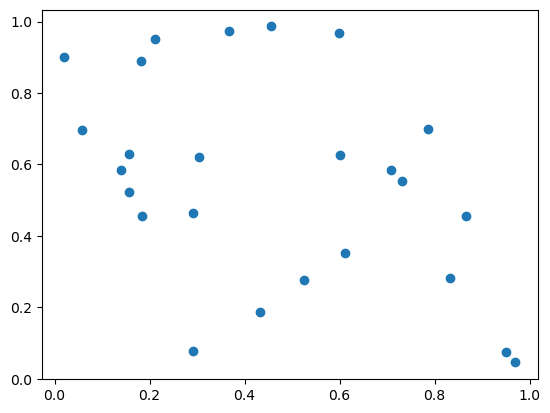

In [20]:
plt.scatter(Uniform_100samples_25anchors_475agents_0Variance_labels[0].T[0][25:50], Uniform_100samples_25anchors_475agents_0Variance_labels[0].T[1][25:50])

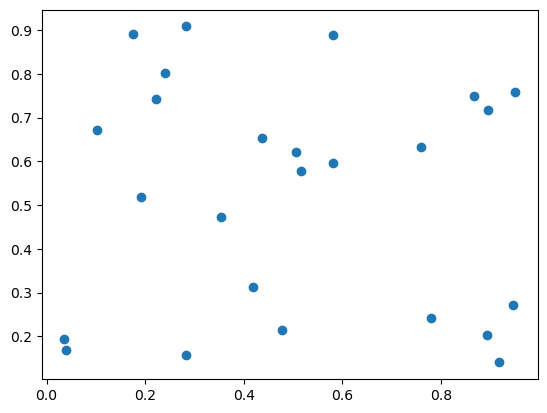

In [21]:
plt.scatter(Uniform_100samples_25anchors_475agents_0Variance_labels[3].T[0][25:50], Uniform_100samples_25anchors_475agents_0Variance_labels[3].T[1][25:50])

### Distance Generation

In [22]:
def compute_distance_matrix(points):
    diff = points[:, np.newaxis, :] - points[np.newaxis, :, :]
    dist_matrix = np.sqrt(np.sum(diff**2, axis=-1)) 
    return dist_matrix

In [23]:
def compute_distance_matrix_noise(points, mean, var):
    diff = points[:, np.newaxis, :] - points[np.newaxis, :, :]
    dist_matrix = np.sqrt(np.sum(diff**2, axis=-1)) 
    dist_matrix_noise = dist_matrix + np.random.normal(loc=mean, scale=np.sqrt(var), size=dist_matrix.shape) * dist_matrix
    return dist_matrix_noise

#### Initialization

Without Noise

In [24]:
Uniform_100samples_5anchors_475agents_0Variance_dist = np.zeros((100, N0, N0))
Uniform_100samples_10anchors_475agents_0Variance_dist = np.zeros((100, N1, N1))
Uniform_100samples_15anchors_475agents_0Variance_dist = np.zeros((100, N2, N2))
Uniform_100samples_20anchors_475agents_0Variance_dist = np.zeros((100, N3, N3))
Uniform_100samples_25anchors_475agents_0Variance_dist = np.zeros((100, N4, N4))
Uniform_100samples_30anchors_475agents_0Variance_dist = np.zeros((100, N5, N5))

Small Noise 0.0025

In [25]:
Uniform_100samples_5anchors_475agents_00025Variance_dist = np.zeros((100, N0, N0))
Uniform_100samples_10anchors_475agents_00025Variance_dist = np.zeros((100, N1, N1))
Uniform_100samples_15anchors_475agents_00025Variance_dist = np.zeros((100, N2, N2))
Uniform_100samples_20anchors_475agents_00025Variance_dist = np.zeros((100, N3, N3))
Uniform_100samples_25anchors_475agents_00025Variance_dist = np.zeros((100, N4, N4))
Uniform_100samples_30anchors_475agents_00025Variance_dist = np.zeros((100, N5, N5))

Medium Noise 0.0225

In [26]:
Uniform_100samples_5anchors_475agents_00225Variance_dist = np.zeros((100, N0, N0))
Uniform_100samples_10anchors_475agents_00225Variance_dist = np.zeros((100, N1, N1))
Uniform_100samples_15anchors_475agents_00225Variance_dist = np.zeros((100, N2, N2))
Uniform_100samples_20anchors_475agents_00225Variance_dist = np.zeros((100, N3, N3))
Uniform_100samples_25anchors_475agents_00225Variance_dist = np.zeros((100, N4, N4))
Uniform_100samples_30anchors_475agents_00225Variance_dist = np.zeros((100, N5, N5))

Large Noise 0.0625

In [27]:
Uniform_100samples_5anchors_475agents_00625Variance_dist = np.zeros((100, N0, N0))
Uniform_100samples_10anchors_475agents_00625Variance_dist = np.zeros((100, N1, N1))
Uniform_100samples_15anchors_475agents_00625Variance_dist = np.zeros((100, N2, N2))
Uniform_100samples_20anchors_475agents_00625Variance_dist = np.zeros((100, N3, N3))
Uniform_100samples_25anchors_475agents_00625Variance_dist = np.zeros((100, N4, N4))
Uniform_100samples_30anchors_475agents_00625Variance_dist = np.zeros((100, N5, N5))

#### Compute the diatance matrices

In [28]:
for k in range(num_sample):
    # Without Noise
    Uniform_100samples_5anchors_475agents_0Variance_dist[k] = compute_distance_matrix(Uniform_100samples_5anchors_475agents_0Variance_labels[k])
    Uniform_100samples_10anchors_475agents_0Variance_dist[k] = compute_distance_matrix(Uniform_100samples_10anchors_475agents_0Variance_labels[k])
    Uniform_100samples_15anchors_475agents_0Variance_dist[k] = compute_distance_matrix(Uniform_100samples_15anchors_475agents_0Variance_labels[k])
    Uniform_100samples_20anchors_475agents_0Variance_dist[k] = compute_distance_matrix(Uniform_100samples_20anchors_475agents_0Variance_labels[k])
    Uniform_100samples_25anchors_475agents_0Variance_dist[k] = compute_distance_matrix(Uniform_100samples_25anchors_475agents_0Variance_labels[k])
    Uniform_100samples_30anchors_475agents_0Variance_dist[k] = compute_distance_matrix(Uniform_100samples_30anchors_475agents_0Variance_labels[k])
    # Small noise 0.0025
    Uniform_100samples_5anchors_475agents_00025Variance_dist[k] = compute_distance_matrix_noise(Uniform_100samples_5anchors_475agents_0Variance_labels[k], 0.0, 0.0025)
    Uniform_100samples_10anchors_475agents_00025Variance_dist[k] = compute_distance_matrix_noise(Uniform_100samples_10anchors_475agents_0Variance_labels[k], 0.0, 0.0025)
    Uniform_100samples_15anchors_475agents_00025Variance_dist[k] = compute_distance_matrix_noise(Uniform_100samples_15anchors_475agents_0Variance_labels[k], 0.0, 0.0025)
    Uniform_100samples_20anchors_475agents_00025Variance_dist[k] = compute_distance_matrix_noise(Uniform_100samples_20anchors_475agents_0Variance_labels[k], 0.0, 0.0025)
    Uniform_100samples_25anchors_475agents_00025Variance_dist[k] = compute_distance_matrix_noise(Uniform_100samples_25anchors_475agents_0Variance_labels[k], 0.0, 0.0025)
    Uniform_100samples_30anchors_475agents_00025Variance_dist[k] = compute_distance_matrix_noise(Uniform_100samples_30anchors_475agents_0Variance_labels[k], 0.0, 0.0025)
    # Medium Noise 0.04
    Uniform_100samples_5anchors_475agents_00225Variance_dist[k] = compute_distance_matrix_noise(Uniform_100samples_5anchors_475agents_0Variance_labels[k], 0.0, 0.0225)
    Uniform_100samples_10anchors_475agents_00225Variance_dist[k] = compute_distance_matrix_noise(Uniform_100samples_10anchors_475agents_0Variance_labels[k], 0.0, 0.0225)
    Uniform_100samples_15anchors_475agents_00225Variance_dist[k] = compute_distance_matrix_noise(Uniform_100samples_15anchors_475agents_0Variance_labels[k], 0.0, 0.0225)
    Uniform_100samples_20anchors_475agents_00225Variance_dist[k] = compute_distance_matrix_noise(Uniform_100samples_20anchors_475agents_0Variance_labels[k], 0.0, 0.0225)
    Uniform_100samples_25anchors_475agents_00225Variance_dist[k] = compute_distance_matrix_noise(Uniform_100samples_25anchors_475agents_0Variance_labels[k], 0.0, 0.0225)
    Uniform_100samples_30anchors_475agents_00225Variance_dist[k] = compute_distance_matrix_noise(Uniform_100samples_30anchors_475agents_0Variance_labels[k], 0.0, 0.0225)
    # Large Noise 0.25
    Uniform_100samples_5anchors_475agents_00625Variance_dist[k] = compute_distance_matrix_noise(Uniform_100samples_5anchors_475agents_0Variance_labels[k], 0.0, 0.0625)
    Uniform_100samples_10anchors_475agents_00625Variance_dist[k] = compute_distance_matrix_noise(Uniform_100samples_10anchors_475agents_0Variance_labels[k], 0.0, 0.0625)
    Uniform_100samples_15anchors_475agents_00625Variance_dist[k] = compute_distance_matrix_noise(Uniform_100samples_15anchors_475agents_0Variance_labels[k], 0.0, 0.0625)
    Uniform_100samples_20anchors_475agents_00625Variance_dist[k] = compute_distance_matrix_noise(Uniform_100samples_20anchors_475agents_0Variance_labels[k], 0.0, 0.0625)
    Uniform_100samples_25anchors_475agents_00625Variance_dist[k] = compute_distance_matrix_noise(Uniform_100samples_25anchors_475agents_0Variance_labels[k], 0.0, 0.0625)
    Uniform_100samples_30anchors_475agents_00625Variance_dist[k] = compute_distance_matrix_noise(Uniform_100samples_30anchors_475agents_0Variance_labels[k], 0.0, 0.0625)
    

### Save the Data

In [29]:
# Without Noise
savemat('Uniform_100samples_5anchors_475agents_0Variance.mat', {'labels': Uniform_100samples_5anchors_475agents_0Variance_labels, 'dist': Uniform_100samples_5anchors_475agents_0Variance_dist, 'range': Uniform_100samples_5anchors_475agents_0Variance_dist, 'N_anchors': N_anchors0, 'N_agents': N_agents})
savemat('Uniform_100samples_10anchors_475agents_0Variance.mat', {'labels': Uniform_100samples_10anchors_475agents_0Variance_labels, 'dist': Uniform_100samples_10anchors_475agents_0Variance_dist, 'range': Uniform_100samples_10anchors_475agents_0Variance_dist, 'N_anchors': N_anchors1, 'N_agents': N_agents})
savemat('Uniform_100samples_15anchors_475agents_0Variance.mat', {'labels': Uniform_100samples_15anchors_475agents_0Variance_labels, 'dist': Uniform_100samples_15anchors_475agents_0Variance_dist, 'range': Uniform_100samples_15anchors_475agents_0Variance_dist, 'N_anchors': N_anchors2, 'N_agents': N_agents})
savemat('Uniform_100samples_20anchors_475agents_0Variance.mat', {'labels': Uniform_100samples_20anchors_475agents_0Variance_labels, 'dist': Uniform_100samples_20anchors_475agents_0Variance_dist, 'range': Uniform_100samples_20anchors_475agents_0Variance_dist, 'N_anchors': N_anchors3, 'N_agents': N_agents})
# savemat('Uniform_100samples_25anchors_475agents_0Variance.mat', {'labels': Uniform_100samples_25anchors_475agents_0Variance_labels, 'dist': Uniform_100samples_25anchors_475agents_0Variance_dist, 'range': Uniform_100samples_25anchors_475agents_0Variance_dist})
savemat('Uniform_100samples_30anchors_475agents_0Variance.mat', {'labels': Uniform_100samples_30anchors_475agents_0Variance_labels, 'dist': Uniform_100samples_30anchors_475agents_0Variance_dist, 'range': Uniform_100samples_30anchors_475agents_0Variance_dist, 'N_anchors': N_anchors5, 'N_agents': N_agents})
# Small noise 0.0025
savemat('Uniform_100samples_5anchors_475agents_00025Variance.mat', {'labels': Uniform_100samples_5anchors_475agents_0Variance_labels, 'dist': Uniform_100samples_5anchors_475agents_0Variance_dist, 'range': Uniform_100samples_5anchors_475agents_00025Variance_dist, 'N_anchors': N_anchors0, 'N_agents': N_agents})
savemat('Uniform_100samples_10anchors_475agents_00025Variance.mat', {'labels': Uniform_100samples_10anchors_475agents_0Variance_labels, 'dist': Uniform_100samples_10anchors_475agents_0Variance_dist, 'range': Uniform_100samples_10anchors_475agents_00025Variance_dist, 'N_anchors': N_anchors1, 'N_agents': N_agents})
savemat('Uniform_100samples_15anchors_475agents_00025Variance.mat', {'labels': Uniform_100samples_15anchors_475agents_0Variance_labels, 'dist': Uniform_100samples_15anchors_475agents_0Variance_dist, 'range': Uniform_100samples_15anchors_475agents_00025Variance_dist, 'N_anchors': N_anchors2, 'N_agents': N_agents})
savemat('Uniform_100samples_20anchors_475agents_00025Variance.mat', {'labels': Uniform_100samples_20anchors_475agents_0Variance_labels, 'dist': Uniform_100samples_20anchors_475agents_0Variance_dist, 'range': Uniform_100samples_20anchors_475agents_00025Variance_dist, 'N_anchors': N_anchors3, 'N_agents': N_agents})
# savemat('Uniform_100samples_25anchors_475agents_00025Variance.mat', {'labels': Uniform_100samples_25anchors_475agents_0Variance_labels, 'dist': Uniform_100samples_25anchors_475agents_0Variance_dist, 'range': Uniform_100samples_25anchors_475agents_00025Variance_dist})
savemat('Uniform_100samples_30anchors_475agents_00025Variance.mat', {'labels': Uniform_100samples_30anchors_475agents_0Variance_labels, 'dist': Uniform_100samples_30anchors_475agents_0Variance_dist, 'range': Uniform_100samples_30anchors_475agents_00025Variance_dist, 'N_anchors': N_anchors5, 'N_agents': N_agents})
# Medium noise 0.04
savemat('Uniform_100samples_5anchors_475agents_00225Variance.mat', {'labels': Uniform_100samples_5anchors_475agents_0Variance_labels, 'dist': Uniform_100samples_5anchors_475agents_0Variance_dist, 'range': Uniform_100samples_5anchors_475agents_00225Variance_dist, 'N_anchors': N_anchors0, 'N_agents': N_agents})
savemat('Uniform_100samples_10anchors_475agents_00225Variance.mat', {'labels': Uniform_100samples_10anchors_475agents_0Variance_labels, 'dist': Uniform_100samples_10anchors_475agents_0Variance_dist, 'range': Uniform_100samples_10anchors_475agents_00225Variance_dist, 'N_anchors': N_anchors1, 'N_agents': N_agents})
savemat('Uniform_100samples_15anchors_475agents_00225Variance.mat', {'labels': Uniform_100samples_15anchors_475agents_0Variance_labels, 'dist': Uniform_100samples_15anchors_475agents_0Variance_dist, 'range': Uniform_100samples_15anchors_475agents_00225Variance_dist, 'N_anchors': N_anchors2, 'N_agents': N_agents})
savemat('Uniform_100samples_20anchors_475agents_00225Variance.mat', {'labels': Uniform_100samples_20anchors_475agents_0Variance_labels, 'dist': Uniform_100samples_20anchors_475agents_0Variance_dist, 'range': Uniform_100samples_20anchors_475agents_00225Variance_dist, 'N_anchors': N_anchors3, 'N_agents': N_agents})
# savemat('Uniform_100samples_25anchors_475agents_004Variance.mat', {'labels': Uniform_100samples_25anchors_475agents_0Variance_labels, 'dist': Uniform_100samples_25anchors_475agents_0Variance_dist, 'range': Uniform_100samples_25anchors_475agents_004Variance_dist})
savemat('Uniform_100samples_30anchors_475agents_00225Variance.mat', {'labels': Uniform_100samples_30anchors_475agents_0Variance_labels, 'dist': Uniform_100samples_30anchors_475agents_0Variance_dist, 'range': Uniform_100samples_30anchors_475agents_00225Variance_dist, 'N_anchors': N_anchors5, 'N_agents': N_agents})
# Large noise 0.25
savemat('Uniform_100samples_5anchors_475agents_00625Variance.mat', {'labels': Uniform_100samples_5anchors_475agents_0Variance_labels, 'dist': Uniform_100samples_5anchors_475agents_0Variance_dist, 'range': Uniform_100samples_5anchors_475agents_00625Variance_dist, 'N_anchors': N_anchors0, 'N_agents': N_agents})
savemat('Uniform_100samples_10anchors_475agents_00625Variance.mat', {'labels': Uniform_100samples_10anchors_475agents_0Variance_labels, 'dist': Uniform_100samples_10anchors_475agents_0Variance_dist, 'range': Uniform_100samples_10anchors_475agents_00625Variance_dist, 'N_anchors': N_anchors1, 'N_agents': N_agents})
savemat('Uniform_100samples_15anchors_475agents_00625Variance.mat', {'labels': Uniform_100samples_15anchors_475agents_0Variance_labels, 'dist': Uniform_100samples_15anchors_475agents_0Variance_dist, 'range': Uniform_100samples_15anchors_475agents_00625Variance_dist, 'N_anchors': N_anchors2, 'N_agents': N_agents})
savemat('Uniform_100samples_20anchors_475agents_00625Variance.mat', {'labels': Uniform_100samples_20anchors_475agents_0Variance_labels, 'dist': Uniform_100samples_20anchors_475agents_0Variance_dist, 'range': Uniform_100samples_20anchors_475agents_00625Variance_dist, 'N_anchors': N_anchors3, 'N_agents': N_agents})
# savemat('Uniform_100samples_25anchors_475agents_025Variance.mat', {'labels': Uniform_100samples_25anchors_475agents_0Variance_labels, 'dist': Uniform_100samples_25anchors_475agents_0Variance_dist, 'range': Uniform_100samples_25anchors_475agents_025Variance_dist})
savemat('Uniform_100samples_30anchors_475agents_00625Variance.mat', {'labels': Uniform_100samples_30anchors_475agents_0Variance_labels, 'dist': Uniform_100samples_30anchors_475agents_0Variance_dist, 'range': Uniform_100samples_30anchors_475agents_00625Variance_dist, 'N_anchors': N_anchors5, 'N_agents': N_agents})

# Data processing

In [6]:
import torch

#### Relavent Functions

In [14]:
def adjacent_normalize(mx):
    """"D^(-0.5)*A*D^(-0.5)"""
    rowsum = np.array(mx.sum(1))
    rowsum[rowsum == 0] = 1e-10
    r_inv_half = np.power(rowsum, -0.5).flatten()
    r_inv_half[np.isinf(r_inv_half)] = 0.
    r_mat_inv = sp.diags(r_inv_half)
    mx = mx.dot(r_mat_inv).transpose().dot(r_mat_inv)
    return mx


def sparse_mx_to_torch_sparse_tensor(sparse_mx):
    """Convert a scipy sparse matrix to a torch sparse tensor."""
    sparse_mx = sparse_mx.tocoo().astype(np.float32)
    indices = torch.from_numpy(
        np.vstack((sparse_mx.row, sparse_mx.col)).astype(np.int64))
    values = torch.from_numpy(sparse_mx.data)
    shape = torch.Size(sparse_mx.shape)
    return torch.sparse.FloatTensor(indices, values, shape)

def normalize(mx):
    """Row-normalize sparse matrix"""
    rowsum = np.array(mx.sum(1))
    rowsum[rowsum == 0] = 1e-10
    r_inv = np.power(rowsum, -1).flatten()
    r_inv[np.isinf(r_inv)] = 0.
    r_mat_inv = sp.diags(r_inv)
    mx = r_mat_inv.dot(mx)
    return mx

def sample(adj_matrix, adj_ture_matrix, max_neighbors=10):
    """
    对每个节点进行邻居采样，确保每个节点的邻居最多为 max_neighbors 条。
    并且优先选择权重最小的边。

    参数:
    adj_matrix (numpy.ndarray): 大小为 (N, N) 的邻接矩阵，其中每个元素是边的权重。
    max_neighbors (int): 每个节点最多保留的邻居数。
    
    返回:
    numpy.ndarray: 更新后的邻接矩阵。
    """
    N = adj_matrix.shape[0]  # 节点数目
    
    # 新的邻接矩阵
    sampled_adj_matrix = np.zeros_like(adj_matrix)
    sampled_true_adj_matrix = np.zeros_like(adj_ture_matrix)
    
    # 对每个节点进行处理
    for i in range(N):
        # 获取节点 i 与其他节点的所有边的权重及其索引
        row = adj_matrix[i]
        row_true = adj_ture_matrix[i]
        
        # 获取非零的边权重和对应的邻居节点
        neighbors = np.where(row > 0)[0]  # 找到与节点 i 相连的所有节点
        weights = row[neighbors]  # 这些节点的边权重
        weights_true = row_true[neighbors]
        
        # 如果当前节点的邻居不超过 max_neighbors，直接复制原来的邻接矩阵
        if len(neighbors) <= max_neighbors:
            sampled_adj_matrix[i, neighbors] = weights
            sampled_true_adj_matrix[i, neighbors] = weights_true
        else:
            # 按照边权重升序排序，选择权重最小的 max_neighbors 条边
            sorted_indices = np.argsort(weights)[:max_neighbors]  # 找到权重最小的 max_neighbors 个边
            selected_neighbors = neighbors[sorted_indices]  # 选中的邻居节点
            selected_weights = weights[sorted_indices]  # 选中的边权重
            selected_weights_true = weights_true[sorted_indices]
            
            # 更新邻接矩阵，只保留选择的邻居和边权重
            sampled_adj_matrix[i, selected_neighbors] = selected_weights
            sampled_true_adj_matrix[i, selected_neighbors] = selected_weights_true
    
    return sampled_adj_matrix, sampled_true_adj_matrix

In [2]:
def load_data(threshold, num_edge = None):
    # Load the dataset
    m = loadmat("./Networks_new/Uniform_100samples_25anchors_475agents_50Percent_025Variance.mat")

    Range_Mat = m["range"]  # Range = Distance + noise
    Dist_Mat = m["dist"]
    labels = m["labels"]

    # Size information
    num_sample = Range_Mat.shape[0]
    N = 500
    N_anchors = 25
    N_agents = 475
    mode_adj = 1
    mode_fea = 1
    
    idx_train = range(0, 70)
    idx_val = range(70, 80)
    idx_test = range(80, 100)
    idx_train = torch.LongTensor(idx_train)
    idx_val = torch.LongTensor(idx_val)
    idx_test = torch.LongTensor(idx_test)
    
    features_all = []
    # labels_all = []
    adj_all = []
    S_all = []
    # delta_all = []
    # degree_all = []
    # fea_original_all = []
    fea_true_all = []
    truncated_noise_all = []
    # Range_Mat_all = []
    # Dist_Mat_all = []
    # Dist_all = []
    # Range_all = []
    
    for k in range(num_sample):
        Range = Range_Mat[k].copy()
        Dist = Dist_Mat[k].copy()
        
        # Truncated range
        Range[Range > threshold] = 0
        Dist[Range > threshold] = 0
        
        # Graphsage sample
        if num_edge:
            Range, Dist = sample(Range, Dist, num_edge)

        # Get the feature matrix
        features = Range.copy()
        
        # get the truncated true feature
        dist = Dist.copy()
        
        # Get the adjacent matrix
        Range_tem = Range.copy()
        Range_tem[Range_tem > 0] = 1
        Adj = Range_tem

        # truncated noise is the unnormalized truncated noize, which is used to compare with the full matrix noise
        truncated_noise = features - dist

        # Sparse matrix form
        features = sp.csr_matrix(features, dtype=np.float64)
        dist = sp.csr_matrix(dist, dtype=np.float64)
        Adj = sp.csr_matrix(Adj, dtype=np.float64)

        # Normalize
        # features_original = normalize(Dist_Mat[k])
        features_true = normalize(dist)
        features = normalize(features)
        adj = normalize(Adj + sp.eye(Adj.shape[0]))
        S = adjacent_normalize(Adj)

        # features = torch.FloatTensor(features.todense())
        features_all.append(sparse_mx_to_torch_sparse_tensor(features))
        adj_all.append(sparse_mx_to_torch_sparse_tensor(adj))
        S_all.append(sparse_mx_to_torch_sparse_tensor(S))
        # delta_all.append(torch.FloatTensor(Delta))
        # degree_all.append(torch.FloatTensor(np.diag(Degree)))
        # fea_original_all.append(torch.FloatTensor(features_original))
        fea_true_all.append(sparse_mx_to_torch_sparse_tensor(features_true))
        truncated_noise_all.append(torch.FloatTensor(truncated_noise))
        # Range_Mat_all.append(torch.FloatTensor(Range_Mat))
        # Dist_Mat_all.append(torch.FloatTensor(Dist_Mat))
        # Dist_all.append(torch.FloatTensor(Dist))
        # Range_all.append(torch.FloatTensor(Range))
    
    labels_all = torch.FloatTensor(labels)
    
    return mode_fea, mode_adj, idx_train, idx_val, idx_test, features_all, labels_all, adj_all, S_all, fea_true_all, truncated_noise_all

In [15]:
mode_fea, mode_adj, idx_train, idx_val, idx_test, features_all, labels_all, adj_all, S_all, fea_true_all, truncated_noise_all = load_data(0.2, 10)

In [25]:
print(labels_all[0].shape)

torch.Size([500, 2])


## Test the new model

In [1]:
from models import GCN, C_GCN

In [3]:
model = C_GCN(nfeat=500,
                nhid1=200,
                nout=2,
                dropout=0.5)

In [6]:
for name, param in model.named_parameters():
    print(f'{name}: {param.requires_grad}')

coeff: False
gc1.weight: True
gc1.bias: True
gc2.weight: True
gc2.bias: True


In [5]:
model.coeff.requires_grad = False

# 重新做一下different agents的实验

In [2]:
num_sample = 100

N_anchors = 15

N_agents0 = 85
N_agents1 = 285
N_agents2 = 485
N_agents3 = 685
N_agents4 = 1885
# N_agents5 = 1075
# N_agents6 = 1275
# N_agents7 = 1475
# N_agents8 = 1675
# N_agents9 = 1875

N0 = N_anchors + N_agents0
N1 = N_anchors + N_agents1
N2 = N_anchors + N_agents2
N3 = N_anchors + N_agents3
N4 = N_anchors + N_agents4
# N5 = N_anchors + N_agents5
# N6 = N_anchors + N_agents6
# N7 = N_anchors + N_agents7
# N8 = N_anchors + N_agents8
# N9 = N_anchors + N_agents9

In [3]:
Uniform_100samples_15anchors_85agents_0Variance_labels = np.zeros((num_sample, N0, 2))
Uniform_100samples_15anchors_285agents_0Variance_labels = np.zeros((num_sample, N1, 2))
Uniform_100samples_15anchors_485agents_0Variance_labels = np.zeros((num_sample, N2, 2))
Uniform_100samples_15anchors_685agents_0Variance_labels = np.zeros((num_sample, N3, 2))
Uniform_100samples_15anchors_1885agents_0Variance_labels = np.zeros((num_sample, N4, 2))
# Uniform_100samples_25anchors_1075agents_0Variance_labels = np.zeros((num_sample, N5, 2))
# Uniform_100samples_25anchors_1275agents_0Variance_labels = np.zeros((num_sample, N6, 2))
# Uniform_100samples_25anchors_1475agents_0Variance_labels = np.zeros((num_sample, N7, 2))
# Uniform_100samples_25anchors_1675agents_0Variance_labels = np.zeros((num_sample, N8, 2))
# Uniform_100samples_25anchors_1875agents_0Variance_labels = np.zeros((num_sample, N9, 2))

In [4]:
cnt = 0
for i in range(5):
    for k in range(num_sample):
        Uniform_100samples_15anchors_85agents_0Variance_labels[k][cnt][0] = 0.0
        Uniform_100samples_15anchors_85agents_0Variance_labels[k][cnt][1] = 1.0 / 4.0 * i
        Uniform_100samples_15anchors_285agents_0Variance_labels[k][cnt][0] = 0.0
        Uniform_100samples_15anchors_285agents_0Variance_labels[k][cnt][1] = 1.0 / 4.0 * i
        Uniform_100samples_15anchors_485agents_0Variance_labels[k][cnt][0] = 0.0
        Uniform_100samples_15anchors_485agents_0Variance_labels[k][cnt][1] = 1.0 / 4.0 * i
        Uniform_100samples_15anchors_685agents_0Variance_labels[k][cnt][0] = 0.0
        Uniform_100samples_15anchors_685agents_0Variance_labels[k][cnt][1] = 1.0 / 4.0 * i
        Uniform_100samples_15anchors_1885agents_0Variance_labels[k][cnt][0] = 0.0
        Uniform_100samples_15anchors_1885agents_0Variance_labels[k][cnt][1] = 1.0 / 4.0 * i
    cnt = cnt + 1

for i in range(5):
    for k in range(num_sample):
        Uniform_100samples_15anchors_85agents_0Variance_labels[k][cnt][0] = 0.5
        Uniform_100samples_15anchors_85agents_0Variance_labels[k][cnt][1] = 1.0 / 4.0 * i
        Uniform_100samples_15anchors_285agents_0Variance_labels[k][cnt][0] = 0.5
        Uniform_100samples_15anchors_285agents_0Variance_labels[k][cnt][1] = 1.0 / 4.0 * i
        Uniform_100samples_15anchors_485agents_0Variance_labels[k][cnt][0] = 0.5
        Uniform_100samples_15anchors_485agents_0Variance_labels[k][cnt][1] = 1.0 / 4.0 * i
        Uniform_100samples_15anchors_685agents_0Variance_labels[k][cnt][0] = 0.5
        Uniform_100samples_15anchors_685agents_0Variance_labels[k][cnt][1] = 1.0 / 4.0 * i
        Uniform_100samples_15anchors_1885agents_0Variance_labels[k][cnt][0] = 0.5
        Uniform_100samples_15anchors_1885agents_0Variance_labels[k][cnt][1] = 1.0 / 4.0 * i
    cnt = cnt + 1
    
for i in range(5):
    for k in range(num_sample):
        Uniform_100samples_15anchors_85agents_0Variance_labels[k][cnt][0] = 1.0
        Uniform_100samples_15anchors_85agents_0Variance_labels[k][cnt][1] = 1.0 / 4.0 * i
        Uniform_100samples_15anchors_285agents_0Variance_labels[k][cnt][0] = 1.0
        Uniform_100samples_15anchors_285agents_0Variance_labels[k][cnt][1] = 1.0 / 4.0 * i
        Uniform_100samples_15anchors_485agents_0Variance_labels[k][cnt][0] = 1.0
        Uniform_100samples_15anchors_485agents_0Variance_labels[k][cnt][1] = 1.0 / 4.0 * i
        Uniform_100samples_15anchors_685agents_0Variance_labels[k][cnt][0] = 1.0
        Uniform_100samples_15anchors_685agents_0Variance_labels[k][cnt][1] = 1.0 / 4.0 * i
        Uniform_100samples_15anchors_1885agents_0Variance_labels[k][cnt][0] = 1.0
        Uniform_100samples_15anchors_1885agents_0Variance_labels[k][cnt][1] = 1.0 / 4.0 * i
    cnt = cnt + 1 

In [5]:
np.random.seed(42)

In [6]:
print(np.random.rand())

0.3745401188473625


In [7]:
for k in range(num_sample):
    #
    Uniform_100samples_15anchors_85agents_0Variance_labels[k].T[0][N_anchors:] = np.random.rand(N_agents0)
    Uniform_100samples_15anchors_85agents_0Variance_labels[k].T[1][N_anchors:] = np.random.rand(N_agents0)
    Uniform_100samples_15anchors_285agents_0Variance_labels[k].T[0][N_anchors:N0] = Uniform_100samples_15anchors_85agents_0Variance_labels[k].T[0][N_anchors:]
    Uniform_100samples_15anchors_285agents_0Variance_labels[k].T[1][N_anchors:N0] = Uniform_100samples_15anchors_85agents_0Variance_labels[k].T[1][N_anchors:]
    Uniform_100samples_15anchors_485agents_0Variance_labels[k].T[0][N_anchors:N0] = Uniform_100samples_15anchors_85agents_0Variance_labels[k].T[0][N_anchors:]
    Uniform_100samples_15anchors_485agents_0Variance_labels[k].T[1][N_anchors:N0] = Uniform_100samples_15anchors_85agents_0Variance_labels[k].T[1][N_anchors:]
    Uniform_100samples_15anchors_685agents_0Variance_labels[k].T[0][N_anchors:N0] = Uniform_100samples_15anchors_85agents_0Variance_labels[k].T[0][N_anchors:]
    Uniform_100samples_15anchors_685agents_0Variance_labels[k].T[1][N_anchors:N0] = Uniform_100samples_15anchors_85agents_0Variance_labels[k].T[1][N_anchors:]
    Uniform_100samples_15anchors_1885agents_0Variance_labels[k].T[0][N_anchors:N0] = Uniform_100samples_15anchors_85agents_0Variance_labels[k].T[0][N_anchors:]
    Uniform_100samples_15anchors_1885agents_0Variance_labels[k].T[1][N_anchors:N0] = Uniform_100samples_15anchors_85agents_0Variance_labels[k].T[1][N_anchors:]
    # Uniform_100samples_25anchors_1075agents_0Variance_labels[k].T[0][N_anchors:N0] = Uniform_100samples_25anchors_75agents_0Variance_labels[k].T[0][N_anchors:]
    # Uniform_100samples_25anchors_1075agents_0Variance_labels[k].T[1][N_anchors:N0] = Uniform_100samples_25anchors_75agents_0Variance_labels[k].T[1][N_anchors:]
    # Uniform_100samples_25anchors_1275agents_0Variance_labels[k].T[0][N_anchors:N0] = Uniform_100samples_25anchors_75agents_0Variance_labels[k].T[0][N_anchors:]
    # Uniform_100samples_25anchors_1275agents_0Variance_labels[k].T[1][N_anchors:N0] = Uniform_100samples_25anchors_75agents_0Variance_labels[k].T[1][N_anchors:]
    # Uniform_100samples_25anchors_1475agents_0Variance_labels[k].T[0][N_anchors:N0] = Uniform_100samples_25anchors_75agents_0Variance_labels[k].T[0][N_anchors:]
    # Uniform_100samples_25anchors_1475agents_0Variance_labels[k].T[1][N_anchors:N0] = Uniform_100samples_25anchors_75agents_0Variance_labels[k].T[1][N_anchors:]
    # Uniform_100samples_25anchors_1675agents_0Variance_labels[k].T[0][N_anchors:N0] = Uniform_100samples_25anchors_75agents_0Variance_labels[k].T[0][N_anchors:]
    # Uniform_100samples_25anchors_1675agents_0Variance_labels[k].T[1][N_anchors:N0] = Uniform_100samples_25anchors_75agents_0Variance_labels[k].T[1][N_anchors:]
    #
    Uniform_100samples_15anchors_285agents_0Variance_labels[k].T[0][N0:N1] = np.random.rand(200)
    Uniform_100samples_15anchors_285agents_0Variance_labels[k].T[1][N0:N1] = np.random.rand(200)
    Uniform_100samples_15anchors_485agents_0Variance_labels[k].T[0][N0:N1] = Uniform_100samples_15anchors_285agents_0Variance_labels[k].T[0][N0:N1]
    Uniform_100samples_15anchors_485agents_0Variance_labels[k].T[1][N0:N1] = Uniform_100samples_15anchors_285agents_0Variance_labels[k].T[1][N0:N1]
    Uniform_100samples_15anchors_685agents_0Variance_labels[k].T[0][N0:N1] = Uniform_100samples_15anchors_285agents_0Variance_labels[k].T[0][N0:N1]
    Uniform_100samples_15anchors_685agents_0Variance_labels[k].T[1][N0:N1] = Uniform_100samples_15anchors_285agents_0Variance_labels[k].T[1][N0:N1]
    Uniform_100samples_15anchors_1885agents_0Variance_labels[k].T[0][N0:N1] = Uniform_100samples_15anchors_285agents_0Variance_labels[k].T[0][N0:N1]
    Uniform_100samples_15anchors_1885agents_0Variance_labels[k].T[1][N0:N1] = Uniform_100samples_15anchors_285agents_0Variance_labels[k].T[1][N0:N1]
    # Uniform_100samples_25anchors_1075agents_0Variance_labels[k].T[0][N0:N1] = Uniform_100samples_25anchors_275agents_0Variance_labels[k].T[0][N0:N1]
    # Uniform_100samples_25anchors_1075agents_0Variance_labels[k].T[1][N0:N1] = Uniform_100samples_25anchors_275agents_0Variance_labels[k].T[1][N0:N1]
    # Uniform_100samples_25anchors_1275agents_0Variance_labels[k].T[0][N0:N1] = Uniform_100samples_25anchors_275agents_0Variance_labels[k].T[0][N0:N1]
    # Uniform_100samples_25anchors_1275agents_0Variance_labels[k].T[1][N0:N1] = Uniform_100samples_25anchors_275agents_0Variance_labels[k].T[1][N0:N1]
    # Uniform_100samples_25anchors_1475agents_0Variance_labels[k].T[0][N0:N1] = Uniform_100samples_25anchors_275agents_0Variance_labels[k].T[0][N0:N1]
    # Uniform_100samples_25anchors_1475agents_0Variance_labels[k].T[1][N0:N1] = Uniform_100samples_25anchors_275agents_0Variance_labels[k].T[1][N0:N1]
    # Uniform_100samples_25anchors_1675agents_0Variance_labels[k].T[0][N0:N1] = Uniform_100samples_25anchors_275agents_0Variance_labels[k].T[0][N0:N1]
    # Uniform_100samples_25anchors_1675agents_0Variance_labels[k].T[1][N0:N1] = Uniform_100samples_25anchors_275agents_0Variance_labels[k].T[1][N0:N1]
    #
    Uniform_100samples_15anchors_485agents_0Variance_labels[k].T[0][N1:N2] = np.random.rand(200)
    Uniform_100samples_15anchors_485agents_0Variance_labels[k].T[1][N1:N2] = np.random.rand(200)
    Uniform_100samples_15anchors_685agents_0Variance_labels[k].T[0][N1:N2] = Uniform_100samples_15anchors_485agents_0Variance_labels[k].T[0][N1:N2]
    Uniform_100samples_15anchors_685agents_0Variance_labels[k].T[1][N1:N2] = Uniform_100samples_15anchors_485agents_0Variance_labels[k].T[1][N1:N2]
    Uniform_100samples_15anchors_1885agents_0Variance_labels[k].T[0][N1:N2] = Uniform_100samples_15anchors_485agents_0Variance_labels[k].T[0][N1:N2]
    Uniform_100samples_15anchors_1885agents_0Variance_labels[k].T[1][N1:N2] = Uniform_100samples_15anchors_485agents_0Variance_labels[k].T[1][N1:N2]
    # Uniform_100samples_25anchors_1075agents_0Variance_labels[k].T[0][N1:N2] = Uniform_100samples_25anchors_475agents_0Variance_labels[k].T[0][N1:N2]
    # Uniform_100samples_25anchors_1075agents_0Variance_labels[k].T[1][N1:N2] = Uniform_100samples_25anchors_475agents_0Variance_labels[k].T[1][N1:N2]
    # Uniform_100samples_25anchors_1275agents_0Variance_labels[k].T[0][N1:N2] = Uniform_100samples_25anchors_475agents_0Variance_labels[k].T[0][N1:N2]
    # Uniform_100samples_25anchors_1275agents_0Variance_labels[k].T[1][N1:N2] = Uniform_100samples_25anchors_475agents_0Variance_labels[k].T[1][N1:N2]
    # Uniform_100samples_25anchors_1475agents_0Variance_labels[k].T[0][N1:N2] = Uniform_100samples_25anchors_475agents_0Variance_labels[k].T[0][N1:N2]
    # Uniform_100samples_25anchors_1475agents_0Variance_labels[k].T[1][N1:N2] = Uniform_100samples_25anchors_475agents_0Variance_labels[k].T[1][N1:N2]
    # Uniform_100samples_25anchors_1675agents_0Variance_labels[k].T[0][N1:N2] = Uniform_100samples_25anchors_475agents_0Variance_labels[k].T[0][N1:N2]
    # Uniform_100samples_25anchors_1675agents_0Variance_labels[k].T[1][N1:N2] = Uniform_100samples_25anchors_475agents_0Variance_labels[k].T[1][N1:N2]
    #
    Uniform_100samples_15anchors_685agents_0Variance_labels[k].T[0][N2:N3] = np.random.rand(200)
    Uniform_100samples_15anchors_685agents_0Variance_labels[k].T[1][N2:N3] = np.random.rand(200)
    Uniform_100samples_15anchors_1885agents_0Variance_labels[k].T[0][N2:N3] = Uniform_100samples_15anchors_685agents_0Variance_labels[k].T[0][N2:N3]
    Uniform_100samples_15anchors_1885agents_0Variance_labels[k].T[1][N2:N3] = Uniform_100samples_15anchors_685agents_0Variance_labels[k].T[1][N2:N3]
    # Uniform_100samples_25anchors_1075agents_0Variance_labels[k].T[0][N2:N3] = Uniform_100samples_25anchors_675agents_0Variance_labels[k].T[0][N2:N3]
    # Uniform_100samples_25anchors_1075agents_0Variance_labels[k].T[1][N2:N3] = Uniform_100samples_25anchors_675agents_0Variance_labels[k].T[1][N2:N3]
    # Uniform_100samples_25anchors_1275agents_0Variance_labels[k].T[0][N2:N3] = Uniform_100samples_25anchors_675agents_0Variance_labels[k].T[0][N2:N3]
    # Uniform_100samples_25anchors_1275agents_0Variance_labels[k].T[1][N2:N3] = Uniform_100samples_25anchors_675agents_0Variance_labels[k].T[1][N2:N3]
    # Uniform_100samples_25anchors_1475agents_0Variance_labels[k].T[0][N2:N3] = Uniform_100samples_25anchors_675agents_0Variance_labels[k].T[0][N2:N3]
    # Uniform_100samples_25anchors_1475agents_0Variance_labels[k].T[1][N2:N3] = Uniform_100samples_25anchors_675agents_0Variance_labels[k].T[1][N2:N3]
    # Uniform_100samples_25anchors_1675agents_0Variance_labels[k].T[0][N2:N3] = Uniform_100samples_25anchors_675agents_0Variance_labels[k].T[0][N2:N3]
    # Uniform_100samples_25anchors_1675agents_0Variance_labels[k].T[1][N2:N3] = Uniform_100samples_25anchors_675agents_0Variance_labels[k].T[1][N2:N3]
    #
    Uniform_100samples_15anchors_1885agents_0Variance_labels[k].T[0][N3:N4] = np.random.rand(1200)
    Uniform_100samples_15anchors_1885agents_0Variance_labels[k].T[1][N3:N4] = np.random.rand(1200)
    # Uniform_100samples_25anchors_1075agents_0Variance_labels[k].T[0][N3:N4] = Uniform_100samples_25anchors_875agents_0Variance_labels[k].T[0][N3:N4]
    # Uniform_100samples_25anchors_1075agents_0Variance_labels[k].T[1][N3:N4] = Uniform_100samples_25anchors_875agents_0Variance_labels[k].T[1][N3:N4]
    # Uniform_100samples_25anchors_1275agents_0Variance_labels[k].T[0][N3:N4] = Uniform_100samples_25anchors_875agents_0Variance_labels[k].T[0][N3:N4]
    # Uniform_100samples_25anchors_1275agents_0Variance_labels[k].T[1][N3:N4] = Uniform_100samples_25anchors_875agents_0Variance_labels[k].T[1][N3:N4]
    # Uniform_100samples_25anchors_1475agents_0Variance_labels[k].T[0][N3:N4] = Uniform_100samples_25anchors_875agents_0Variance_labels[k].T[0][N3:N4]
    # Uniform_100samples_25anchors_1475agents_0Variance_labels[k].T[1][N3:N4] = Uniform_100samples_25anchors_875agents_0Variance_labels[k].T[1][N3:N4]
    # Uniform_100samples_25anchors_1675agents_0Variance_labels[k].T[0][N3:N4] = Uniform_100samples_25anchors_875agents_0Variance_labels[k].T[0][N3:N4]
    # Uniform_100samples_25anchors_1675agents_0Variance_labels[k].T[1][N3:N4] = Uniform_100samples_25anchors_875agents_0Variance_labels[k].T[1][N3:N4]
    #
    # Uniform_100samples_25anchors_1075agents_0Variance_labels[k].T[0][N4:N5] = np.random.rand(200)
    # Uniform_100samples_25anchors_1075agents_0Variance_labels[k].T[1][N4:N5] = np.random.rand(200)
    # Uniform_100samples_25anchors_1275agents_0Variance_labels[k].T[0][N4:N5] = Uniform_100samples_25anchors_1075agents_0Variance_labels[k].T[0][N4:N5]
    # Uniform_100samples_25anchors_1275agents_0Variance_labels[k].T[1][N4:N5] = Uniform_100samples_25anchors_1075agents_0Variance_labels[k].T[1][N4:N5]
    # Uniform_100samples_25anchors_1475agents_0Variance_labels[k].T[0][N4:N5] = Uniform_100samples_25anchors_1075agents_0Variance_labels[k].T[0][N4:N5]
    # Uniform_100samples_25anchors_1475agents_0Variance_labels[k].T[1][N4:N5] = Uniform_100samples_25anchors_1075agents_0Variance_labels[k].T[1][N4:N5]
    # Uniform_100samples_25anchors_1675agents_0Variance_labels[k].T[0][N4:N5] = Uniform_100samples_25anchors_1075agents_0Variance_labels[k].T[0][N4:N5]
    # Uniform_100samples_25anchors_1675agents_0Variance_labels[k].T[1][N4:N5] = Uniform_100samples_25anchors_1075agents_0Variance_labels[k].T[1][N4:N5]
    #
    # Uniform_100samples_25anchors_1275agents_0Variance_labels[k].T[0][N5:N6] = np.random.rand(200)
    # Uniform_100samples_25anchors_1275agents_0Variance_labels[k].T[1][N5:N6] = np.random.rand(200)
    # Uniform_100samples_25anchors_1475agents_0Variance_labels[k].T[0][N5:N6] = Uniform_100samples_25anchors_1275agents_0Variance_labels[k].T[0][N5:N6]
    # Uniform_100samples_25anchors_1475agents_0Variance_labels[k].T[1][N5:N6] = Uniform_100samples_25anchors_1275agents_0Variance_labels[k].T[1][N5:N6]
    # Uniform_100samples_25anchors_1675agents_0Variance_labels[k].T[0][N5:N6] = Uniform_100samples_25anchors_1275agents_0Variance_labels[k].T[0][N5:N6]
    # Uniform_100samples_25anchors_1675agents_0Variance_labels[k].T[1][N5:N6] = Uniform_100samples_25anchors_1275agents_0Variance_labels[k].T[1][N5:N6]
    #
    # Uniform_100samples_25anchors_1475agents_0Variance_labels[k].T[0][N6:N7] = np.random.rand(200)
    # Uniform_100samples_25anchors_1475agents_0Variance_labels[k].T[1][N6:N7] = np.random.rand(200)
    # Uniform_100samples_25anchors_1675agents_0Variance_labels[k].T[0][N6:N7] = Uniform_100samples_25anchors_1475agents_0Variance_labels[k].T[0][N6:N7]
    # Uniform_100samples_25anchors_1675agents_0Variance_labels[k].T[1][N6:N7] = Uniform_100samples_25anchors_1475agents_0Variance_labels[k].T[0][N6:N7]
    #
    # Uniform_100samples_25anchors_1675agents_0Variance_labels[k].T[0][N7:N8] = np.random.rand(200)
    # Uniform_100samples_25anchors_1675agents_0Variance_labels[k].T[1][N7:N8] = np.random.rand(200)

In [8]:
def compute_distance_matrix(points):
    diff = points[:, np.newaxis, :] - points[np.newaxis, :, :]
    dist_matrix = np.sqrt(np.sum(diff**2, axis=-1)) 
    return dist_matrix

def compute_distance_matrix_noise(points, mean, var):
    diff = points[:, np.newaxis, :] - points[np.newaxis, :, :]
    dist_matrix = np.sqrt(np.sum(diff**2, axis=-1)) 
    dist_matrix_noise = dist_matrix + np.random.normal(loc=mean, scale=np.sqrt(var), size=dist_matrix.shape) * dist_matrix
    return dist_matrix_noise

no noise

In [13]:
Uniform_100samples_15anchors_85agents_0Variance_dist = np.zeros((num_sample, N0, N0))
Uniform_100samples_15anchors_285agents_0Variance_dist = np.zeros((num_sample, N1, N1))
Uniform_100samples_15anchors_485agents_0Variance_dist = np.zeros((num_sample, N2, N2))
Uniform_100samples_15anchors_685agents_0Variance_dist = np.zeros((num_sample, N3, N3))
Uniform_100samples_15anchors_1885agents_0Variance_dist = np.zeros((num_sample, N4, N4))
# Uniform_100samples_15anchors_1075agents_0Variance_dist = np.zeros((num_sample, N5, N5))
# Uniform_100samples_15anchors_1275agents_0Variance_dist = np.zeros((num_sample, N6, N6))
# Uniform_100samples_15anchors_1475agents_0Variance_dist = np.zeros((num_sample, N7, N7))
# Uniform_100samples_15anchors_1675agents_0Variance_dist = np.zeros((num_sample, N8, N8))

small noise

In [14]:
Uniform_100samples_15anchors_85agents_00025Variance_dist = np.zeros((num_sample, N0, N0))
Uniform_100samples_15anchors_285agents_00025Variance_dist = np.zeros((num_sample, N1, N1))
Uniform_100samples_15anchors_485agents_00025Variance_dist = np.zeros((num_sample, N2, N2))
Uniform_100samples_15anchors_685agents_00025Variance_dist = np.zeros((num_sample, N3, N3))
Uniform_100samples_15anchors_1885agents_00025Variance_dist = np.zeros((num_sample, N4, N4))

medium noise

In [15]:
Uniform_100samples_15anchors_85agents_00225Variance_dist = np.zeros((num_sample, N0, N0))
Uniform_100samples_15anchors_285agents_00225Variance_dist = np.zeros((num_sample, N1, N1))
Uniform_100samples_15anchors_485agents_00225Variance_dist = np.zeros((num_sample, N2, N2))
Uniform_100samples_15anchors_685agents_00225Variance_dist = np.zeros((num_sample, N3, N3))
Uniform_100samples_15anchors_1885agents_00225Variance_dist = np.zeros((num_sample, N4, N4))

large nosie

In [16]:
Uniform_100samples_15anchors_85agents_00625Variance_dist = np.zeros((num_sample, N0, N0))
Uniform_100samples_15anchors_285agents_00625Variance_dist = np.zeros((num_sample, N1, N1))
Uniform_100samples_15anchors_485agents_00625Variance_dist = np.zeros((num_sample, N2, N2))
Uniform_100samples_15anchors_685agents_00625Variance_dist = np.zeros((num_sample, N3, N3))
Uniform_100samples_15anchors_1885agents_00625Variance_dist = np.zeros((num_sample, N4, N4))

In [17]:
for k in range(num_sample):
    # Without Noise
    Uniform_100samples_15anchors_85agents_0Variance_dist[k] = compute_distance_matrix(Uniform_100samples_15anchors_85agents_0Variance_labels[k])
    Uniform_100samples_15anchors_285agents_0Variance_dist[k] = compute_distance_matrix(Uniform_100samples_15anchors_285agents_0Variance_labels[k])
    Uniform_100samples_15anchors_485agents_0Variance_dist[k] = compute_distance_matrix(Uniform_100samples_15anchors_485agents_0Variance_labels[k])
    Uniform_100samples_15anchors_685agents_0Variance_dist[k] = compute_distance_matrix(Uniform_100samples_15anchors_685agents_0Variance_labels[k])
    Uniform_100samples_15anchors_1885agents_0Variance_dist[k] = compute_distance_matrix(Uniform_100samples_15anchors_1885agents_0Variance_labels[k])
    # Uniform_100samples_25anchors_1075agents_0Variance_dist[k] = compute_distance_matrix(Uniform_100samples_25anchors_1075agents_0Variance_labels[k])
    # Uniform_100samples_25anchors_1275agents_0Variance_dist[k] = compute_distance_matrix(Uniform_100samples_25anchors_1275agents_0Variance_labels[k])
    # Uniform_100samples_25anchors_1475agents_0Variance_dist[k] = compute_distance_matrix(Uniform_100samples_25anchors_1475agents_0Variance_labels[k])
    # Uniform_100samples_25anchors_1675agents_0Variance_dist[k] = compute_distance_matrix(Uniform_100samples_25anchors_1675agents_0Variance_labels[k])
    # Uniform_100samples_25anchors_1875agents_0Variance_dist[k] = compute_distance_matrix(Uniform_100samples_25anchors_1875agents_0Variance_labels[k])
    # Small noise 0.0025
    Uniform_100samples_15anchors_85agents_00025Variance_dist[k] = compute_distance_matrix_noise(Uniform_100samples_15anchors_85agents_0Variance_labels[k], 0.0, 0.0025)
    Uniform_100samples_15anchors_285agents_00025Variance_dist[k] = compute_distance_matrix_noise(Uniform_100samples_15anchors_285agents_0Variance_labels[k], 0.0, 0.0025)
    Uniform_100samples_15anchors_485agents_00025Variance_dist[k] = compute_distance_matrix_noise(Uniform_100samples_15anchors_485agents_0Variance_labels[k], 0.0, 0.0025)
    Uniform_100samples_15anchors_685agents_00025Variance_dist[k] = compute_distance_matrix_noise(Uniform_100samples_15anchors_685agents_0Variance_labels[k], 0.0, 0.0025)
    Uniform_100samples_15anchors_1885agents_00025Variance_dist[k] = compute_distance_matrix_noise(Uniform_100samples_15anchors_1885agents_0Variance_labels[k], 0.0, 0.0025)
    # Uniform_100samples_25anchors_1075agents_00025Variance_dist[k] = compute_distance_matrix_noise(Uniform_100samples_25anchors_1075agents_0Variance_labels[k], 0.0, 0.0025)
    # Uniform_100samples_25anchors_1275agents_00025Variance_dist[k] = compute_distance_matrix_noise(Uniform_100samples_25anchors_1275agents_0Variance_labels[k], 0.0, 0.0025)
    # Uniform_100samples_25anchors_1475agents_00025Variance_dist[k] = compute_distance_matrix_noise(Uniform_100samples_25anchors_1475agents_0Variance_labels[k], 0.0, 0.0025)
    # Uniform_100samples_25anchors_1675agents_00025Variance_dist[k] = compute_distance_matrix_noise(Uniform_100samples_25anchors_1675agents_0Variance_labels[k], 0.0, 0.0025)
    # Uniform_100samples_25anchors_1875agents_00025Variance_dist[k] = compute_distance_matrix_noise(Uniform_100samples_25anchors_1875agents_0Variance_labels[k], 0.0, 0.0025)
    # Medium Noise 0.0225
    Uniform_100samples_15anchors_85agents_00225Variance_dist[k] = compute_distance_matrix_noise(Uniform_100samples_15anchors_85agents_0Variance_labels[k], 0.0, 0.0225)
    Uniform_100samples_15anchors_285agents_00225Variance_dist[k] = compute_distance_matrix_noise(Uniform_100samples_15anchors_285agents_0Variance_labels[k], 0.0, 0.0225)
    Uniform_100samples_15anchors_485agents_00225Variance_dist[k] = compute_distance_matrix_noise(Uniform_100samples_15anchors_485agents_0Variance_labels[k], 0.0, 0.0225)
    Uniform_100samples_15anchors_685agents_00225Variance_dist[k] = compute_distance_matrix_noise(Uniform_100samples_15anchors_685agents_0Variance_labels[k], 0.0, 0.0225)
    Uniform_100samples_15anchors_1885agents_00225Variance_dist[k] = compute_distance_matrix_noise(Uniform_100samples_15anchors_1885agents_0Variance_labels[k], 0.0, 0.0225)
    # Uniform_100samples_25anchors_1075agents_00225Variance_dist[k] = compute_distance_matrix_noise(Uniform_100samples_25anchors_1075agents_0Variance_labels[k], 0.0, 0.0225)
    # Uniform_100samples_25anchors_1275agents_00225Variance_dist[k] = compute_distance_matrix_noise(Uniform_100samples_25anchors_1275agents_0Variance_labels[k], 0.0, 0.0225)
    # Uniform_100samples_25anchors_1475agents_00225Variance_dist[k] = compute_distance_matrix_noise(Uniform_100samples_25anchors_1475agents_0Variance_labels[k], 0.0, 0.0225)
    # Uniform_100samples_25anchors_1675agents_00225Variance_dist[k] = compute_distance_matrix_noise(Uniform_100samples_25anchors_1675agents_0Variance_labels[k], 0.0, 0.0225)
    # Uniform_100samples_25anchors_1875agents_00225Variance_dist[k] = compute_distance_matrix_noise(Uniform_100samples_25anchors_1875agents_0Variance_labels[k], 0.0, 0.0225)
    # Large Noise 0.0625
    Uniform_100samples_15anchors_85agents_00625Variance_dist[k] = compute_distance_matrix_noise(Uniform_100samples_15anchors_85agents_0Variance_labels[k], 0.0, 0.0625)
    Uniform_100samples_15anchors_285agents_00625Variance_dist[k] = compute_distance_matrix_noise(Uniform_100samples_15anchors_285agents_0Variance_labels[k], 0.0, 0.0625)
    Uniform_100samples_15anchors_485agents_00625Variance_dist[k] = compute_distance_matrix_noise(Uniform_100samples_15anchors_485agents_0Variance_labels[k], 0.0, 0.0625)
    Uniform_100samples_15anchors_685agents_00625Variance_dist[k] = compute_distance_matrix_noise(Uniform_100samples_15anchors_685agents_0Variance_labels[k], 0.0, 0.0625)
    Uniform_100samples_15anchors_1885agents_00625Variance_dist[k] = compute_distance_matrix_noise(Uniform_100samples_15anchors_1885agents_0Variance_labels[k], 0.0, 0.0625)
    # Uniform_100samples_25anchors_1075agents_00625Variance_dist[k] = compute_distance_matrix_noise(Uniform_100samples_25anchors_1075agents_0Variance_labels[k], 0.0, 0.0625)
    # Uniform_100samples_25anchors_1275agents_00625Variance_dist[k] = compute_distance_matrix_noise(Uniform_100samples_25anchors_1275agents_0Variance_labels[k], 0.0, 0.0625)
    # Uniform_100samples_25anchors_1475agents_00625Variance_dist[k] = compute_distance_matrix_noise(Uniform_100samples_25anchors_1475agents_0Variance_labels[k], 0.0, 0.0625)
    # Uniform_100samples_25anchors_1675agents_00625Variance_dist[k] = compute_distance_matrix_noise(Uniform_100samples_25anchors_1675agents_0Variance_labels[k], 0.0, 0.0625)
    # Uniform_100samples_25anchors_1875agents_00625Variance_dist[k] = compute_distance_matrix_noise(Uniform_100samples_25anchors_1875agents_0Variance_labels[k], 0.0, 0.0625)
    

In [18]:
# Without Noise
# savemat('Uniform_100samples_15anchors_85agents_0Variance.mat', {'labels': Uniform_100samples_15anchors_85agents_0Variance_labels, 'dist': Uniform_100samples_15anchors_85agents_0Variance_dist, 'range': Uniform_100samples_15anchors_85agents_0Variance_dist, 'N_anchors': N_anchors, 'N_agents': N_agents0})
# savemat('Uniform_100samples_15anchors_285agents_0Variance.mat', {'labels': Uniform_100samples_15anchors_285agents_0Variance_labels, 'dist': Uniform_100samples_15anchors_285agents_0Variance_dist, 'range': Uniform_100samples_15anchors_285agents_0Variance_dist, 'N_anchors': N_anchors, 'N_agents': N_agents1})
# savemat('Uniform_100samples_15anchors_485agents_0Variance.mat', {'labels': Uniform_100samples_15anchors_485agents_0Variance_labels, 'dist': Uniform_100samples_15anchors_485agents_0Variance_dist, 'range': Uniform_100samples_15anchors_485agents_0Variance_dist, 'N_anchors': N_anchors, 'N_agents': N_agents2})
# savemat('Uniform_100samples_15anchors_685agents_0Variance.mat', {'labels': Uniform_100samples_15anchors_685agents_0Variance_labels, 'dist': Uniform_100samples_15anchors_685agents_0Variance_dist, 'range': Uniform_100samples_15anchors_685agents_0Variance_dist, 'N_anchors': N_anchors, 'N_agents': N_agents3})
savemat('Uniform_100samples_15anchors_1885agents_0Variance.mat', {'labels': Uniform_100samples_15anchors_1885agents_0Variance_labels, 'dist': Uniform_100samples_15anchors_1885agents_0Variance_dist, 'range': Uniform_100samples_15anchors_1885agents_0Variance_dist, 'N_anchors': N_anchors, 'N_agents': N_agents4})
# savemat('Uniform_100samples_25anchors_1075agents_0Variance.mat', {'labels': Uniform_100samples_25anchors_1075agents_0Variance_labels, 'dist': Uniform_100samples_25anchors_1075agents_0Variance_dist, 'range': Uniform_100samples_25anchors_1075agents_0Variance_dist, 'N_anchors': N_anchors, 'N_agents': N_agents5})
# savemat('Uniform_100samples_25anchors_1275agents_0Variance.mat', {'labels': Uniform_100samples_25anchors_1275agents_0Variance_labels, 'dist': Uniform_100samples_25anchors_1275agents_0Variance_dist, 'range': Uniform_100samples_25anchors_1275agents_0Variance_dist, 'N_anchors': N_anchors, 'N_agents': N_agents6})
# savemat('Uniform_100samples_25anchors_1475agents_0Variance.mat', {'labels': Uniform_100samples_25anchors_1475agents_0Variance_labels, 'dist': Uniform_100samples_25anchors_1475agents_0Variance_dist, 'range': Uniform_100samples_25anchors_1475agents_0Variance_dist, 'N_anchors': N_anchors, 'N_agents': N_agents7})
# savemat('Uniform_100samples_25anchors_1675agents_0Variance.mat', {'labels': Uniform_100samples_25anchors_1675agents_0Variance_labels, 'dist': Uniform_100samples_25anchors_1675agents_0Variance_dist, 'range': Uniform_100samples_25anchors_1675agents_0Variance_dist, 'N_anchors': N_anchors, 'N_agents': N_agents8})
# savemat('Uniform_100samples_25anchors_1875agents_0Variance.mat', {'labels': Uniform_100samples_25anchors_1875agents_0Variance_labels, 'dist': Uniform_100samples_25anchors_1875agents_0Variance_dist, 'range': Uniform_100samples_25anchors_1875agents_0Variance_dist, 'N_anchors': N_anchors, 'N_agents': N_agents9})
# Small noise 0.0025
# savemat('Uniform_100samples_15anchors_85agents_00025Variance.mat', {'labels': Uniform_100samples_15anchors_85agents_0Variance_labels, 'dist': Uniform_100samples_15anchors_85agents_0Variance_dist, 'range': Uniform_100samples_15anchors_85agents_00025Variance_dist, 'N_anchors': N_anchors, 'N_agents': N_agents0})
# savemat('Uniform_100samples_15anchors_285agents_00025Variance.mat', {'labels': Uniform_100samples_15anchors_285agents_0Variance_labels, 'dist': Uniform_100samples_15anchors_285agents_0Variance_dist, 'range': Uniform_100samples_15anchors_285agents_00025Variance_dist, 'N_anchors': N_anchors, 'N_agents': N_agents1})
# savemat('Uniform_100samples_15anchors_485agents_00025Variance.mat', {'labels': Uniform_100samples_15anchors_485agents_0Variance_labels, 'dist': Uniform_100samples_15anchors_485agents_0Variance_dist, 'range': Uniform_100samples_15anchors_485agents_00025Variance_dist, 'N_anchors': N_anchors, 'N_agents': N_agents2})
# savemat('Uniform_100samples_15anchors_685agents_00025Variance.mat', {'labels': Uniform_100samples_15anchors_685agents_0Variance_labels, 'dist': Uniform_100samples_15anchors_685agents_0Variance_dist, 'range': Uniform_100samples_15anchors_685agents_00025Variance_dist, 'N_anchors': N_anchors, 'N_agents': N_agents3})
savemat('Uniform_100samples_15anchors_1885agents_00025Variance.mat', {'labels': Uniform_100samples_15anchors_1885agents_0Variance_labels, 'dist': Uniform_100samples_15anchors_1885agents_0Variance_dist, 'range': Uniform_100samples_15anchors_1885agents_00025Variance_dist, 'N_anchors': N_anchors, 'N_agents': N_agents4})
# savemat('Uniform_100samples_25anchors_1075agents_00025Variance.mat', {'labels': Uniform_100samples_25anchors_1075agents_0Variance_labels, 'dist': Uniform_100samples_25anchors_1075agents_0Variance_dist, 'range': Uniform_100samples_25anchors_1075agents_00025Variance_dist, 'N_anchors': N_anchors, 'N_agents': N_agents5})
# savemat('Uniform_100samples_25anchors_1275agents_00025Variance.mat', {'labels': Uniform_100samples_25anchors_1275agents_0Variance_labels, 'dist': Uniform_100samples_25anchors_1275agents_0Variance_dist, 'range': Uniform_100samples_25anchors_1275agents_00025Variance_dist, 'N_anchors': N_anchors, 'N_agents': N_agents6})
# savemat('Uniform_100samples_25anchors_1475agents_00025Variance.mat', {'labels': Uniform_100samples_25anchors_1475agents_0Variance_labels, 'dist': Uniform_100samples_25anchors_1475agents_0Variance_dist, 'range': Uniform_100samples_25anchors_1475agents_00025Variance_dist, 'N_anchors': N_anchors, 'N_agents': N_agents7})
# savemat('Uniform_100samples_25anchors_1675agents_00025Variance.mat', {'labels': Uniform_100samples_25anchors_1675agents_0Variance_labels, 'dist': Uniform_100samples_25anchors_1675agents_0Variance_dist, 'range': Uniform_100samples_25anchors_1675agents_00025Variance_dist, 'N_anchors': N_anchors, 'N_agents': N_agents8})
# savemat('Uniform_100samples_25anchors_1875agents_00025Variance.mat', {'labels': Uniform_100samples_25anchors_1875agents_0Variance_labels, 'dist': Uniform_100samples_25anchors_1875agents_0Variance_dist, 'range': Uniform_100samples_25anchors_1875agents_00025Variance_dist, 'N_anchors': N_anchors, 'N_agents': N_agents9})
# Medium noise 0.0225
# savemat('Uniform_100samples_15anchors_85agents_00225Variance.mat', {'labels': Uniform_100samples_15anchors_85agents_0Variance_labels, 'dist': Uniform_100samples_15anchors_85agents_0Variance_dist, 'range': Uniform_100samples_15anchors_85agents_00225Variance_dist, 'N_anchors': N_anchors, 'N_agents': N_agents0})
# savemat('Uniform_100samples_15anchors_285agents_00225Variance.mat', {'labels': Uniform_100samples_15anchors_285agents_0Variance_labels, 'dist': Uniform_100samples_15anchors_285agents_0Variance_dist, 'range': Uniform_100samples_15anchors_285agents_00225Variance_dist, 'N_anchors': N_anchors, 'N_agents': N_agents1})
# savemat('Uniform_100samples_15anchors_485agents_00225Variance.mat', {'labels': Uniform_100samples_15anchors_485agents_0Variance_labels, 'dist': Uniform_100samples_15anchors_485agents_0Variance_dist, 'range': Uniform_100samples_15anchors_485agents_00225Variance_dist, 'N_anchors': N_anchors, 'N_agents': N_agents2})
# savemat('Uniform_100samples_15anchors_685agents_00225Variance.mat', {'labels': Uniform_100samples_15anchors_685agents_0Variance_labels, 'dist': Uniform_100samples_15anchors_685agents_0Variance_dist, 'range': Uniform_100samples_15anchors_685agents_00225Variance_dist, 'N_anchors': N_anchors, 'N_agents': N_agents3})
savemat('Uniform_100samples_15anchors_1885agents_00225Variance.mat', {'labels': Uniform_100samples_15anchors_1885agents_0Variance_labels, 'dist': Uniform_100samples_15anchors_1885agents_0Variance_dist, 'range': Uniform_100samples_15anchors_1885agents_00225Variance_dist, 'N_anchors': N_anchors, 'N_agents': N_agents4})
# savemat('Uniform_100samples_25anchors_1075agents_00225Variance.mat', {'labels': Uniform_100samples_25anchors_1075agents_0Variance_labels, 'dist': Uniform_100samples_25anchors_1075agents_0Variance_dist, 'range': Uniform_100samples_25anchors_1075agents_00225Variance_dist, 'N_anchors': N_anchors, 'N_agents': N_agents5})
# savemat('Uniform_100samples_25anchors_1275agents_00225Variance.mat', {'labels': Uniform_100samples_25anchors_1275agents_0Variance_labels, 'dist': Uniform_100samples_25anchors_1275agents_0Variance_dist, 'range': Uniform_100samples_25anchors_1275agents_00225Variance_dist, 'N_anchors': N_anchors, 'N_agents': N_agents6})
# savemat('Uniform_100samples_25anchors_1475agents_00225Variance.mat', {'labels': Uniform_100samples_25anchors_1475agents_0Variance_labels, 'dist': Uniform_100samples_25anchors_1475agents_0Variance_dist, 'range': Uniform_100samples_25anchors_1475agents_00225Variance_dist, 'N_anchors': N_anchors, 'N_agents': N_agents7})
# savemat('Uniform_100samples_25anchors_1675agents_00225Variance.mat', {'labels': Uniform_100samples_25anchors_1675agents_0Variance_labels, 'dist': Uniform_100samples_25anchors_1675agents_0Variance_dist, 'range': Uniform_100samples_25anchors_1675agents_00225Variance_dist, 'N_anchors': N_anchors, 'N_agents': N_agents8})
# savemat('Uniform_100samples_25anchors_1875agents_00225Variance.mat', {'labels': Uniform_100samples_25anchors_1875agents_0Variance_labels, 'dist': Uniform_100samples_25anchors_1875agents_0Variance_dist, 'range': Uniform_100samples_25anchors_1875agents_00225Variance_dist, 'N_anchors': N_anchors, 'N_agents': N_agents9})
# Large noise 0.0625
# savemat('Uniform_100samples_15anchors_85agents_00625Variance.mat', {'labels': Uniform_100samples_15anchors_85agents_0Variance_labels, 'dist': Uniform_100samples_15anchors_85agents_0Variance_dist, 'range': Uniform_100samples_15anchors_85agents_00625Variance_dist, 'N_anchors': N_anchors, 'N_agents': N_agents0})
# savemat('Uniform_100samples_15anchors_285agents_00625Variance.mat', {'labels': Uniform_100samples_15anchors_285agents_0Variance_labels, 'dist': Uniform_100samples_15anchors_285agents_0Variance_dist, 'range': Uniform_100samples_15anchors_285agents_00625Variance_dist, 'N_anchors': N_anchors, 'N_agents': N_agents1})
# savemat('Uniform_100samples_15anchors_485agents_00625Variance.mat', {'labels': Uniform_100samples_15anchors_485agents_0Variance_labels, 'dist': Uniform_100samples_15anchors_485agents_0Variance_dist, 'range': Uniform_100samples_15anchors_485agents_00625Variance_dist, 'N_anchors': N_anchors, 'N_agents': N_agents2})
# savemat('Uniform_100samples_15anchors_685agents_00625Variance.mat', {'labels': Uniform_100samples_15anchors_685agents_0Variance_labels, 'dist': Uniform_100samples_15anchors_685agents_0Variance_dist, 'range': Uniform_100samples_15anchors_685agents_00625Variance_dist, 'N_anchors': N_anchors, 'N_agents': N_agents3})
savemat('Uniform_100samples_15anchors_1885agents_00625Variance.mat', {'labels': Uniform_100samples_15anchors_1885agents_0Variance_labels, 'dist': Uniform_100samples_15anchors_1885agents_0Variance_dist, 'range': Uniform_100samples_15anchors_1885agents_00625Variance_dist, 'N_anchors': N_anchors, 'N_agents': N_agents4})
# savemat('Uniform_100samples_25anchors_1075agents_00625Variance.mat', {'labels': Uniform_100samples_25anchors_1075agents_0Variance_labels, 'dist': Uniform_100samples_25anchors_1075agents_0Variance_dist, 'range': Uniform_100samples_25anchors_1075agents_00625Variance_dist, 'N_anchors': N_anchors, 'N_agents': N_agents5})
# savemat('Uniform_100samples_25anchors_1275agents_00625Variance.mat', {'labels': Uniform_100samples_25anchors_1275agents_0Variance_labels, 'dist': Uniform_100samples_25anchors_1275agents_0Variance_dist, 'range': Uniform_100samples_25anchors_1275agents_00625Variance_dist, 'N_anchors': N_anchors, 'N_agents': N_agents6})
# savemat('Uniform_100samples_25anchors_1475agents_00625Variance.mat', {'labels': Uniform_100samples_25anchors_1475agents_0Variance_labels, 'dist': Uniform_100samples_25anchors_1475agents_0Variance_dist, 'range': Uniform_100samples_25anchors_1475agents_00625Variance_dist, 'N_anchors': N_anchors, 'N_agents': N_agents7})
# savemat('Uniform_100samples_25anchors_1675agents_00625Variance.mat', {'labels': Uniform_100samples_25anchors_1675agents_0Variance_labels, 'dist': Uniform_100samples_25anchors_1675agents_0Variance_dist, 'range': Uniform_100samples_25anchors_1675agents_00625Variance_dist, 'N_anchors': N_anchors, 'N_agents': N_agents8})
# savemat('Uniform_100samples_25anchors_1875agents_00625Variance.mat', {'labels': Uniform_100samples_25anchors_1875agents_0Variance_labels, 'dist': Uniform_100samples_25anchors_1875agents_0Variance_dist, 'range': Uniform_100samples_25anchors_1875agents_00625Variance_dist, 'N_anchors': N_anchors, 'N_agents': N_agents9})